# 실험실

In [2]:
import requests, re, os, shutil
from bs4 import BeautifulSoup
from selenium import webdriver
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import urllib, requests, time
from PIL import Image
import torch
import clip
import pickle

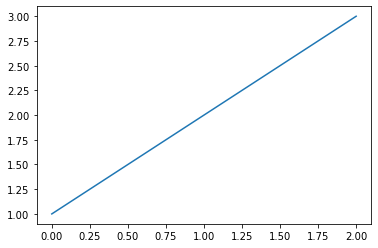

In [2]:
plt.plot([1,2,3])

In [4]:
import tensorflow as tf

ImportError: cannot import name 'StructureCoder' from 'tensorflow.python.saved_model.nested_structure_coder' (D:\Anaconda\lib\site-packages\tensorflow\python\saved_model\nested_structure_coder.py)

In [14]:
! pip install torch==1.7.1 torchvision==0.8.2

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


ERROR: Could not find a version that satisfies the requirement torchvision==0.8.2 (from versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.11.1, 0.11.2, 0.11.3, 0.12.0)
ERROR: No matching distribution found for torchvision==0.8.2


In [15]:
torch.cuda.is_available() 

False

In [1]:
import torch
print(torch.cuda.is_available())

True


In [65]:
driver = webdriver.Chrome('data_files/chromedriver.exe')

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_5552/3555466094.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('data_files/chromedriver.exe')


In [67]:
url = 'https://www.musinsa.com/category/001'
driver.get(url)
driver.maximize_window()

In [88]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
currnent_page = 1
i = 0
# total_page = int(soup.select('.pagingNumber .totalPagingNum')[0].text)
total_page = 50
while currnent_page < total_page:
    print(currnent_page, i)
    page = driver.find_elements_by_css_selector('div.pagination > div > a.paging-btn')[2:13][i]
    
    if page.text == '':
        print('next_page')
        page.click()
        i = 0
        time.sleep(1)
    elif int(page.text) == currnent_page + 1:
        page.click()
        i += 1
        currnent_page = currnent_page + 1
        time.sleep(1)
    else: 
        i += 1

1 0
1 1


C:\Users\bitcamp\AppData\Local\Temp/ipykernel_10724/4169473783.py:9: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  page = driver.find_elements_by_css_selector('div.pagination > div > a.paging-btn')[2:13][i]


2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
next_page
10 0
11 1
12 2
13 3
14 4
15 5
16 6
17 7
18 8
19 9
20 10
next_page
20 0
21 1
22 2
23 3
24 4
25 5
26 6
27 7
28 8
29 9
30 10
next_page
30 0
31 1
32 2
33 3
34 4
35 5
36 6
37 7
38 8
39 9
40 10
next_page
40 0
41 1
42 2
43 3
44 4
45 5
46 6
47 7
48 8
49 9


In [21]:
url = 'http://image.msscdn.net/images/goods_img/20210316/1848166/1848166_11_500.jpg?t=20220404173105'

In [23]:
urllib.request.urlretrieve(url, "img/test.jpg")

('img/test.jpg', <http.client.HTTPMessage at 0x200a15d9eb0>)

In [59]:
df = pd.DataFrame()

In [60]:
test_dic_li = [{'제목': '하늘을 나는 자동차', 'url': 'http://naver.com'}, {'제목': '방귀쟁이 뿡뿡이', 'url': 'http://google.com'}]

In [61]:
start = time.time()
for i in test_dic_li:
    df = df.append(i, ignore_index=True)
    
end = time.time()

print(f"{end - start:.5f} sec")


0.00399 sec


In [55]:
df

,제목,url
0,하늘을 나는 자동차,http://naver.com
1,방귀쟁이 뿡뿡이,http://google.com


In [1]:
!pip install -e .

ERROR: File "setup.py" or "setup.cfg" not found. Directory cannot be installed in editable mode: C:\Users\bitcamp\Desktop\bb\final_project


In [4]:
webdriver.Chrome(executable_path=Config.CONFIG['chromepath'])

NameError: name 'Config' is not defined

In [8]:
img_titles = os.listdir('img/origin_img')

In [9]:
title_li = []
for title in img_titles:
    if plt.imread(f'img/origin_img/{title}').shape == (600, 500, 3):
        title_li.append(title)


In [10]:
# from shutil import copyfile
# for title in title_li:
#     copyfile(f'img/origin_img/{title}',f'img/prepro_img/{title}')

In [18]:
title.split('.')[0]

'히트기어 아머 컴프레션 슬리브리스 1361522090'

In [20]:

for title in title_li:
    split_title = title.split('.')[0]
    im = Image.open(f'img/origin_img(same_shape)/{title}').convert('RGB')
    im.save(f'img/origin_img(png)/{split_title}.png', 'png')

In [ ]:
from PIL import Image
for title in title_li:
    img = Image.open('data/src/sample.png')

    img_resize = img.resize((256, 256))
    img_resize.save('data/dst/sample_pillow_resize_nearest.jpg')

    

In [6]:
infos = os.listdir('data_files/img_infos')

In [9]:
infos[0].split('.')[0][-3:]

'100'

In [33]:
df_li = []
for info in infos:
    max_page = info.split('.')[0][-3:]
    df_li.append(pd.read_csv(f'data_files/img_infos/{info}', index_col='Unnamed: 0'))

In [38]:
df = pd.concat(df_li).reset_index(drop=True)

In [39]:
df

,제목,img_url,브랜드,품번,시즌,성별,조회수,판매수,좋아요,평점,리뷰수,태그,가격
0,에센셜 쿨 코튼 2PACK 티셔츠,http://image.msscdn.net/images/goods_img/20210...,COVERNAT,CO0000STE1BK,2022 S/S,남여,594000.0,123000.0,114696.0,4.8,28195.0,"['반팔티셔츠', '티셔츠', '반팔', '반팔티', '오버핏반팔', '에센셜라인'...",49000.0
1,시티보이 빅오버 옥스포드 반팔 셔츠_Sky Blue,http://image.msscdn.net/images/goods_img/20210...,LAFUDGESTORE,m1037_685377,2021 S/S,남,471000.0,57000.0,61891.0,4.8,19551.0,"['오버핏셔츠', '셔츠', '오버핏', '반팔셔츠', '시티보이셔츠', '하프셔츠...",45000.0
2,610 배송 린넨 라이크 카라 하프 니트 8 COLORLINENLIKE COLLA...,http://image.msscdn.net/images/goods_img/20210...,SUARE,1084865,2022 S/S,남,371000.0,24000.0,26593.0,4.8,4012.0,"['여름니트', '반팔', '카라티', '남자니트', '반팔니트', '카라', '서...",55000.0
3,011502 폴로 피케 반팔티,http://image.msscdn.net/images/goods_img/20210...,GIORDANO,011502,2021 S/S,남,256000.0,74000.0,24451.0,4.8,18663.0,"['반팔티셔츠', '반팔티', 'PK', '카라티셔츠', '카라티']",16800.0
4,베이식 긴팔 티셔츠 화이트BASIC LONG SLEEVE TSHIRT WHITE,http://image.msscdn.net/images/goods_img/20190...,MUSINSA STANDARD,MITS0009-WH,NaN,NaN,23000.0,94000.0,53928.0,4.8,142854.0,"['기본티', '긴팔티', '라운드넥', '루즈핏', '면티셔츠', '무지티', '...",13900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22131,FACELOGO BANDINGMARDI CROP TSHIRTBLACK,http://image.msscdn.net/images/goods_img/20220...,ITER WOMENS,IIEMFRT004BK,2022 S/S,여,2300.0,5.0,596.0,4.9,42.0,NaN,39000.0
22132,LIFE IS TEEPUNK ROCK TEECHARCOAL,http://image.msscdn.net/images/goods_img/20220...,OUTSTANDING,OSTD244,2022 S/S,남,3300.0,5.0,157.0,4.6,13.0,"['여름반팔', '반팔티', '반팔', '티셔츠', '로고티셔츠', '오버핏', '...",45000.0
22133,펫 클럽 해피콜리 하프 티셔츠 블랙,http://image.msscdn.net/images/goods_img/20220...,ACOVER,ACT22957,2022 S/S,여,1100.0,5.0,183.0,4.7,9.0,NaN,39000.0
22134,웨일 티셔츠 블랙,http://image.msscdn.net/images/goods_img/20220...,COVERNAT,CO2202ST74BK,2022 S/S,남,1600.0,5.0,369.0,5.0,33.0,"['반팔티', '반팔', '반팔티셔츠', '티셔츠', '로고티셔츠', '쿨코튼', ...",45000.0


## 한글 제목 영어로 번역하기

In [2]:
from googletrans import Translator

# Translator 클래스 객체 선언 (translator라는 변수명은 마음대로 정해주면 됨)
translator = Translator()

In [3]:
df = pd.read_csv('data_files/img_infos/img_info_total.csv', index_col='Unnamed: 0')

FileNotFoundError: [Errno 2] No such file or directory: 'data_files/img_infos/img_info_total.csv'

In [ ]:
title_li = []
for i, title in enumerate(df.제목):
    text = translator.translate(title).text
    title_li.append(text)
    print(i, text)
    time.sleep(0.5)

In [38]:
pt_li = os.listdir('data_files/image_features/style/')

In [39]:
t = torch.load(f'data_files/image_features/style/{pt_li[0]}')
for pt in pt_li[1:]:
    t_temp = torch.load(f'data_files/image_features/style/{pt}')
    t = torch.cat([t, t_temp])

In [42]:
# torch.save(t, 'data_files/image_features/style/total.pt')

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)
checkpoint = torch.load("fine_tuning_models/model_prepro_coat.pt")
model.load_state_dict(checkpoint['model_state_dict'])
#cifar100 = CIFAR100(root=os.path.expanduser("~/.cache"), download=True, train=False)

In [ ]:
input_text = "a short-sleeved T-shirt"
text_inputs = clip.tokenize([input_text]).to(device)
text_features = model.encode_text(text_inputs)
text_features /= text_features.norm(dim=-1, keepdim=True)

In [ ]:
image_features = torch.load('data_files/image_features/coat_propro(tuning)/total.pt')

In [ ]:
similarity = (100.0 * text_features @ image_features.T).softmax(dim=-1)

In [15]:
values, indices = similarity[0].topk(5)

In [16]:
style_li = os.listdir('img_files/origin_coat_img(prepro)/')

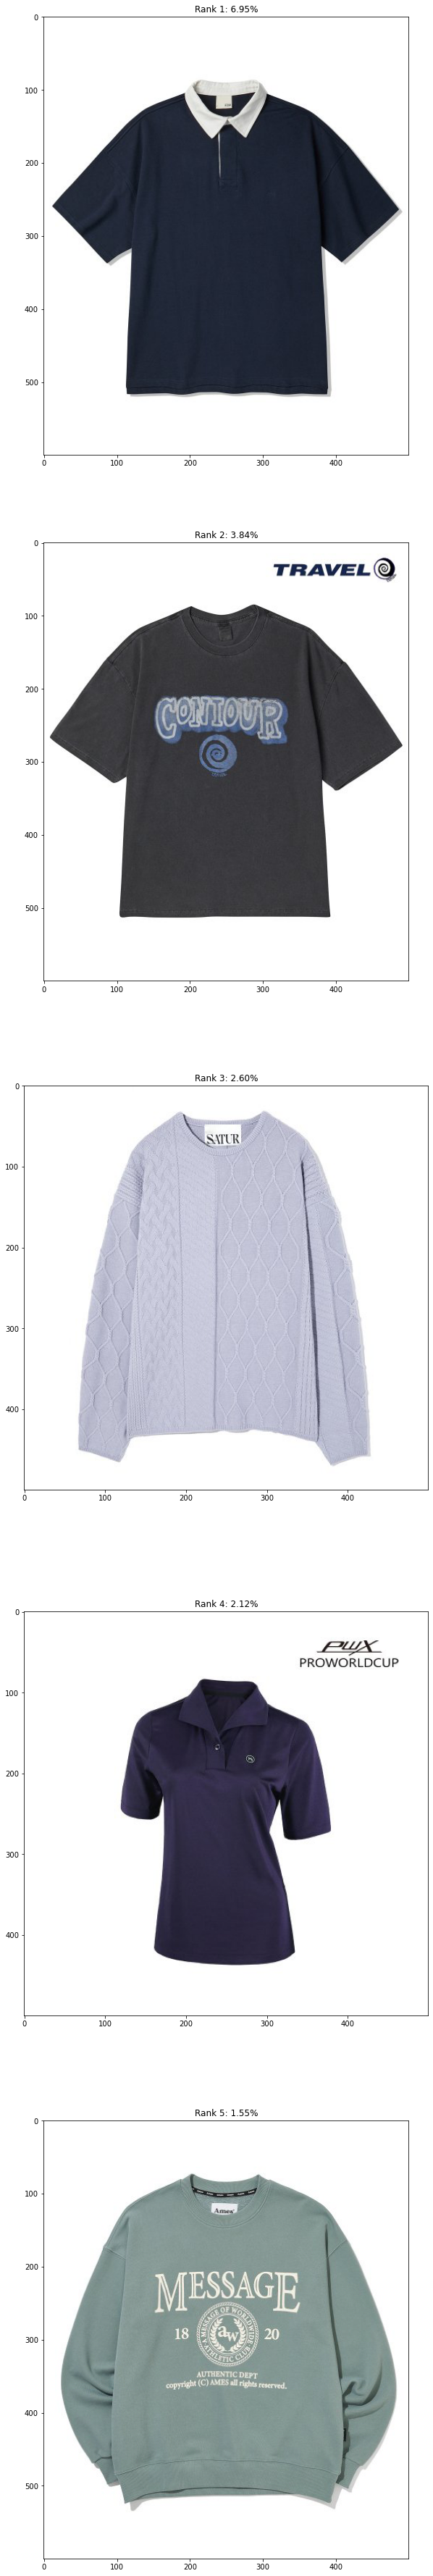

In [18]:
fig, axes = plt.subplots(5, 1, figsize=(10,10))
count = 0
for value, idx in zip(values, indices):
   # print(title_li[idx])
    axes[count].imshow(np.array(Image.open(f'img_files/origin_coat_img(prepro)/{style_li[idx]}')))
    axes[count].set_title(f"Rank {count + 1}: {100 * value.item():.2f}%")
    count += 1
plt.subplots_adjust(top=5)
plt.show()

In [19]:
from googletrans import Translator

# Translator 클래스 객체 선언 (translator라는 변수명은 마음대로 정해주면 됨)
translator = Translator()

In [24]:
df = pd.read_csv('data_files/img_infos_csv/코디2최종.csv', index_col='Unnamed: 0')

In [83]:
df = df.fillna('')

In [84]:
data_li = []
url = 'img_files/코디2/'
for i in range(len(df))[14645:]:
    text = df.iloc[i]['제목'] + df.iloc[i]['룩']
    img_title = df.iloc[i]['사진']
    img_url = (url + img_title)
    trans_text = translator.translate(text).text
    print(i, trans_text)
    data_li.append({'image_url': img_url, 'caption': trans_text})
    time.sleep(0.5)

14645 The best is comfortable
14646 Shirt









Casual look neatly produced with semi -sleeves shirts with check patterns and cotton pants
14647 Daily









Easy casual look finished by adding denim pants to a t -shirt with a striped pattern
14648 Unique shirt









Street casual look with a fascinating shirt and cotton pants
14649 Comfortable and hip









Street casual look with t -shirts and jogger pants with graphics
14650 A certain presence









Street casual look completed with a taidai t -shirt and cotton pants with color combinations
14651 I like it because it is simple









Easy Casual Look, which is simple with denim pants with half -sleeved T -shirts and belt details
14652 Sporty look









Sports casual look with active t -shirts with color schemes adds activity by matching shorts
14653 Shorts in summer!









Easy Casual Look directed with a half -sleeved shirt and denim shorts of oversized fit
14654 Summer shirt









A striped shirt with grap

14733 Street casual look that matches the shorts with a pink color with a comfortable sleeve t -shirt and finishes with sneakers
14734 End with a dress! Semi -formal look with a shirt dress with mint color and pastel's earrings and finished with mules.
14735 It's so pretty, a date look with a maxi -long dress with slit detail and a mules consisting of a check pattern
14736 It's all! Easy casual look that is simple with Sleebres T -shirt and pants
14737 Date look with blouses with pretty lace details and shorts
14738 The trend is shirting! T -shirts with shirts and denim pants add personalities.
14739 Everyone likes Easy Casual Look completed with a crop style semi -sleeves T -shirt and denim shorts
14740 Summer coordination! Retro Look with semi -sleeves T -shirts and shorts
14741 The street casual look completed with denim pants with a sleeve cardigan and a distance of denim pants
14742 Honey Tips Sharing Sharing Cardigan and Overol Pants Add active fabric with American casual look
14

14816 Dandy Look with a neat style white shirt and oversized fit shorts
14817 If you wear it, you can wear a cute t -shirt and waist banding.
14818 Street casual look that matches men's pink lifesils and shorts and casual with ball caps
14819 Recommended! Easy casual look that is easily completed with a semi -sleeved T -shirt and denim pants with logo printing
14820 Sports casual look completed by styling adidas sweatshirts and shorts
14821 Run my man! Adidas sweatshirts and shorts match the sports casual look with comfort
14822 Street casual look made by matching a cool girl's oversized pit T -shirt with denim pants
14823 The breathtaking back! The street casual look completed with an oversized semi -sleeved T -shirt and denim skirt
14824 Uniqueness overflowing with off -shoulder crop t -shirts and denim pants
14825 Fresh orange girl! A street casual look made with a crop -style semi -sleeve t -shirt and cargo style skirt
14826 Easy Casual Look completed with a cute & innocent -style 

14899 An American casual look with a semi -sleeves shirt with a pattern and a loose fit denim pants
14900 American casual matching Overfit Kannen Nen Heninneck shirt with oversized fit jogger pants
14901 Witty! Witting printing t -shirts and linen cotton mixed cargo pants
14902 The color is done









Casual look with a semi -sleeved T -shirt with orange color and sporty shorts
14903 I like the dress!







Street casual look with a button detail denim dress and adding a beret to add points
14904 Cody







Retro Look, which matched a dress with a letter of lettering alone and gave a point with a bucket hat.
14905 Easy Casual Look made a comfortable lime color knit and wide -fitting denim pants.
14906 The school look with a backpack with a crop shirt with a summer uniform oversized fit and a cotton shorts
14907 Pretty pink sleeveless and cardigan matched with a setup and added denim skirt to finish
14908 Easy Casual Look with an open kara shirt with a cute summer pattern and a den

14978 A casual look with a refreshing t -shirt with a refreshing neon color nylon shorts
14979 A casual look with a semi -sleeves T -shirt with regular fit denim pants every day
14980 Casual look that matches a pleasant t -shirt with a pleasant t -shirt and check shorts.
14981 Wearing a look lettering logo, a semi -sleeves T -shirt with a mustard color slacks
14982 A combination of a pleasant combination and a half -sleeved shirt and a clean jogger pants with a pleasant combination and a Leopard pattern
14983 A casual look with a semi -sleeved T -shirt with a clear t -shirt and a comfortable belt shorts
14984 Casual look with a brutal tiered t -shirt with a bintage mood and a wide cotton jogger pants
14985 Today, a semi -formal look with a calm jejirinen jacket and shorts and a yellow color mule
14986 It's so pretty, it's a bright date look completed with a mini dress with lace detail and a slide
14987 Easy casual look that coordinates the jacket and sleeveless material material and fi

15056 Bandana shirt coordination







Street look with a Bandana pattern shirt and a comfortable fit pocket cotton pants
15057 Rap Skirt Cody







Casual look with a basic semi -sleeved T -shirt with bright colors and a striped wrap skirt
15058 Essential item







Sports casual completed with big logo half -sleeved T -shirts, color leggings, logo socks and sneakers
15059 The color is pretty







Semi -formal look using a simple charm knit dress
15060 In the sky







Lovely casual look with natural light blue t -shirts and pleated skirts
15061 Linen setup look







A look with a unique linen -based sleeveless with a pleated strap with a setup of wide pants
15062 The world's pretty







A travel look with a lovely off -shoulder rap dress and a bright mule and a mini bag
15063 Good to wear every day







Street look with a sliced top with a crop top and a cargo skirt
15064 Stylish







Athlete look that matches chic and sporty track pants and cropped semi -sleeved T -shi

15136 Easy Casual Look created with a semi -sleeved color t -shirt and cotton pants with a cute pumstripe pattern
15137 Easy casual look made by matching a half -sleeved T -shirt and shorts with a color scheme of sleeves
15138 Date -looking dates coordinating the dress and slides with cute details
15139 Life look, life shot! Summer cardigan and shorts match and cool with slides
15140 Date look with a cute dress and a check pattern dress with a cute dress.
15141 A sporty t -shirt! Festival look that adds personality by matching the Taai pattern semi -sleeves T -shirt and denim shorts
15142 Easy Casual Look with a loose loose stripe shirt and a wide crop slacks
15143 Easy casual look that matches shorts with a front and back logo with a short -sleeved T -shirt with a notable logo in front and back.
15144 Easy casual look that looks cool with a striped shorts with a short -sleeved T -shirt with a surf mood with the waves.
15145 Easy casual look that matched the back logo with a half -t -s

15212 Neatly, a semi -formal look with a single bee or a color pin striped shirt with Basic Bermuda Shorts
15213 Festival look with blouses with festival goddess slib shearing and denim shorts
15214 Date look with a blouse with a cutting detail with a cutting details and a denim skirt
15215 Date look with a dress with the perfect harmony bone detail and a lace -up sandals
15216 Easy casual look coordinated with a semi -sleeved T -shirt and shorts that gave details with youthful ventiless printing
15217 Style Check Complete Taiidai Pattern T -shirt and Jimshoz Easy Casual Look
15218 Easy casual look that matches a short -sleeved T -shirt with a kick in the sea and a short -fashioned shorts
15219 It's cute! A sports casual look that matches a half -sleeved T -shirt and a gimchoz.
15220 When it's hot, it's lightly matched with a light -to -size t -shirt with a light -to -size t -shirt.
15221 Easy Casual look that matches the movie with a good half -sleeved T -shirt with a wide cotton pant

15291 Street mood logo half -sleeved T -shirt matched with a leisurely oversized look and finished with denim shorts and sneakers
15292 A travel look with a tower with dot patterns and shearing details and lavender wrap skirts.
15293 A look with a calm orange knit semi -sleeve t -shirt with a color block skirt
15294 A comfortable school look with a warm color mantle logo half -sleeved T -shirt with a button -down mid -skirt
15295 Knit Setup Look Light Knit Shell T -shirt and Mini Skirt
15296 Resort Beauty Blue Stripe Crop Top and Ruffled Skirt
15297 Casual look completed with half -sleeved T -shirts and white denim skirts
15298 Cute combination of orange color semi -sleeves t -shirts and check mini skirts this summer
15299 Easy Casual Look with Logo T -shirts and ivory Washing Pants that can be worn every day
15300 Date look with tone on -tone look punching lace shirts with tone on -tone
15301 Every day, a campus look with a semi -sleeves shirt with a soft blue color and a check mini s

15370 Hearty cool







A casual look with a combination of calm lavender colors and denim pants
15371 The best maturity! The semi -formal look completed with a unique t -shirt and wide -fit pants
15372 Easy Casual look that is easy to complete with comfortable daily luxlop t -shirt and wide fit denim pants
15373 Semi -formal look neatly produced with semi -sleeve cardigans and semi -wide fit denim pants every day.
15374 Campus look neatly completed with bright t -shirts and sneakers
15375 Red Point Casual Look with a half -sleeved T -shirt with her lettering and a wide fit pants
15376 It's so pretty! Semi -formal look styling with a skirt with a half -sleeved cardigan and a slit.
15377 The trend is Essles! Unbalanced sleeve coordinated with unique t -shirts and leggings
15378 This combination is perfect for a street casual look with a half -sleeved T -shirt and a tennis skirt with a perfect kitsch printing.
15379 Retro's heat stripe semi -sleeves T -shirt and wide -fit denim pants
15

15451 Innocent Sexy White Color Off Shoulder One Piece and Cross Bags Festival Look
15452 Easy Casual Look with Color combination matches a short -sleeved T -shirt with MIDI skirt
15453 Lovely! A bright date look with a dress with yellow color and sandals
15454 A neat campus look with a fresh campus look and a skirt
15455 Fashionista! Street casual look that matches semi -sleeved T -shirts and pants and points to newsboy caps
15456 Campus Look completed with sneakers and sneakers
15457 Today is bold! Unique off -shoulder t -shirts and skirts
15458 Easy casual look with a unique dress with a unique point detail and a lace -up sandals
15459 Cute and refreshing! A lovely date look with a crop cardigan and a check pattern skirt
15460 Easy Casual Look with Crop Top Stylinking T -shirts and stitching pants with stitch details
15461 Date look finished with a cute dress with a paisley pattern ended with a dress
15462 Easy casual look that matches a full -fledged sleeve T -shirt with a vintage 

15529 End with a shirt!







Street casual look with unique graphics matching charming shirts and denim pants made of coating.
15530 Tidy







Easy casual look made by matching a striped shirt with denim pants.
15531 This is the street







Street casual look with unique graphics and orange cross bags.
15532 Color restaurant







The campus look is finished by matching the logo half -sleeved T -shirt and denim pants and adding a vivid colored jacket.
15533 How to use hoodies







Street casual look with a hoodie with a lettering point and a cotton shorts.
15534 A sports casual look completed by matching the night walk mode cute character T -shirt with comfortable sweat pants
15535 Sports casual styling with t -shirts and jogger pants with printing on the back of the back force
15536 The street casual look with a t -shirt with a naughty kitsch and a check shorts
15537 Campus look with fresh t -shirt embroidered printing with cute t -shirts and denim pants
15538 Points properly

15605 Unexpected combination







A look with a casual circle logo half -sleeved T -shirt with beige wide slacks
15606 Daily t -shirt







Easy casual combination of signature logo short -sleeved T -shirts and calm check pattern shorts
15607 Cool







Over -size fit logo half -sleeve T -shirt and light green color match with a wide slacks
15608 Street casual look that matched the Fashionista Craw T -shirt and wide denim pants and gave points with newsboy caps
15609 Easy Casual Look with a bright spring -looking yellow t -shirt and a mid -skirt
15610 Street casual look with a semi -sleeved T -shirt with chic carismafrying and purple skinny pants
15611 One piece is enough! The American Casual Look completed with a unique dress and neon color sakosh bag
15612 Ending with a setup, a refreshing and cool blue color check setup and a cute date look completed with sneakers
15613 Lovely sea shearing details match with a lovely dress and a waistback point
15614 I want to wear every day, I 

15682 Clean and brightly sleeve t -shirts and check shirts layered and finished with cotton pants.
15683 This is a good coordination of American casual look that stylishly produces sapari jackets and cotton pants in a match.
15684 I like it! Layered a semi -sleeve shirt and basic long -class t -shirt and finished with cotton pants
15685 Easy Casual Look finished with shorts with a sweatshirt with a coordinated colorful color.
15686 Perfect for rain!
15687 Street casual look with a shirt with a unique pattern configuration with an outer opening.
15688 Campus Look made by matching a short -term striped shirt with white pants
15689 Somehow, the street casual look that is unique with a short -fashioned shorts with a lively safari jacket and an unbalanced length.
15690 It's just this season!
15691 Kopi Pang Fang! Hip -hop look coordinating over roll pants and striped long -class t -shirts
15692 Easy Casual Look completed with a shorts and a short -sleeved T -shirt with a cute denim jacket a

15765 Matching smoothly chic black shirts and slacks, adding points with belts and loafers, and finishing with trench coats
15766 Elegantly







Formal look is made elegantly by using a black long dress alone.
15767 Sporty girl







A sports casual look that adds activity by matching a gray anorak jacket with a sweating skirt.
15768 Perfect for daily!







Easy casual look that matches a sweatshirt and a cargo style skirt and adds a cross bag.
15769 Retro sensibility







Retro -look matches an oversized fit leather jacket and a dress with a vivid color.
15770 Easy casual look that matches the crop hoodie of Camo's charm Camoplage pattern and denim pants.
15771 Easy to cool







Easy casual look that gives a point by adding a Leopard pattern skirt with a basic design sweat shirt.
15772 Lovely







A date look with a blouse with a color scheme and a white shorts.
15773 Self -light







Formal look is completed by adding a shirt -style dress with a check pattern.
15774 Camp

15838 Mint Hyanggi Mountain Mint Mint Mint Color Base T -shirt with Yeoncheong denim pants
15839 Easy Casual completed with a half -half shirt white and ivory color half -and -half color and loose fit cargo pants
15840 Natural charm, natural gray color, combination of shirts and denim pants that are not boring even if used alone
15841 Street Vibe Fake Leather Trucker Jacket, Pigment Sweatshirt, Street Casual with Basic Shorts
15842 Semifhomal Look with a relaxed cool pin striped shirt with a loose fit beige slacks
15843 Minimalist calm yellow -colored crew knit, straight slacks and sneakers
15844 Square check shirt, logo semi -sleeves T -shirt, and cargo wide pants that are easy to use!
15845 Semi -formal look matching a soft beige -colored crop shirt with a straight coordinated coordination
15846 The check shirt is an American casual matching a check shirt with an essential color combination, a striped knit and an indigo denim pants.
15847 Easy Casual completed with fresh shirt look c

15913 Street casual matching a cropped long sleeveless t -shirt with a logo with a chic crop -look sleeve
15914 A casual look with a refreshing logo t -shirt with an unbalanced denim skirt with a neon color holic light light light color color
15915 A bright spring look completed with a bright spring look ruck trucker jacket, a striped top and a pink cotton mini skirt
15916 A look using a new dress calm check pattern and a dress with a tight silhouette
15917 Half -sleeved knit -look striped details with half -sleeved knits and denim pants
15918 Easy Casual with a sensory gestlife half -sleeved T -shirt and beige belt wide pants
15919 If the color is good, the combination of trucker jackets with graphics, neon orange turtleneck long -class t -shirts, crop denim pants
15920 Sailor collar with frill & skirt frill and a check pattern with a blouse with a check pleats skirt
15921 Easy Casual with the world's cute stripe long -sleeved t -shirt and checkplete mini skirt
15922 Lovely Casual Die

15988 My type







A fascinating dating look with Western boots with a lap dress with bright colors and patterns
15989 Fight in color!







Date look with a t -shirt with a purple color and a layered overall and a unique ankle boots
15990 How to wear well over roll







The unique Easy Casual look with off -shoulder t -shirt and maxi overall and finishing with sneakers
15991 Unique







Street casual look with orange long -class t -shirts match track pants with a sideline logo
15992 As if I didn't decorate it







Campus look that matches off -shoulder t -shirts and denim skirts and wears points with sling bags
15993 Natural fashion







Simple Easy Casual look with regular fit check shirt and wide cargo pants and finished with sneakers
15994 Spring outing look







Formal/Office Look with a bright blue shirt with denim pants and a point with a lemon -colored sling bag
15995 How to use cardigan







It's a good idea to match the Basic Sleebris with an overfit cardigan a

16061 How to use blazer, semi -formal look with a basic semi -sleeves T -shirt with a blazer and a unique design skirt
16062 Setup casual color color scheme with a knit setup and colorful sneakers
16063 A lovely campus look that matches the juice of colorful knits and denim skirts and gives points with a backpack
16064 Semi -formal look that is good to wear a skirt setup with a pure -sided check pattern and a daily match with a basic sneakers.
16065 The completion of fashion is Easy Casual Look finished with a pouch bag with a neon color match with Denim Denim setup and a cropped semi -sleeved T -shirt.
16066 Refreshing Valal Long Shirt One Piece and Overfit Cardigan Layered and completed with sneakers
16067 Spring girlfriend's bright crop knit with a cardigan with a cardigan, and a spring date look completed with roll -up denim pants
16068 Easy Casual Look with a cute overall overall and a polar neck knit with a cute overall and an orange color and finished with sneakers
16069 With a 

16136 Street casual look that matches the world's comfortable sweat -shirt and jogger pants and adds a beanie.
16137 Easy casual look completed by matching a sweat -shirt with a lettering sweatshirt and denim pants.
16138 The semi -formal look is neatly matched by matching polo knit and wide -fit Slacks with clean match zip -up details.
16139 The campus look is completed by matching a sweatshirt with a fresh color orange color and a wide fit denim pants.
16140 A sports casual look that adds activity by matching anorak shirts and sweat pants.
16141 The semi formal is neatly produced by matching a loose charm basic cardigan and wide pants.
16142 Easy casual look with a clean and clean sweatshirt and a wide fit pants with unique details.
16143 Street casual look with t -shirts and color blocks with unique graphics with unique graphics.
16144 Easy casual look that simply matches knit and wide -fit cargo pants with a nice stream -lifting pattern.
16145 Retro Emotion Big Logo T -shirt, Vinta

16209 The coolness of the opening! Campus Look, which matched the oversized fit knit and Light Blue Denim and gave points with Leopard Camp Cap
16210 Easy Casual Look, styling a decent color combination blue paper jacket and a basic long -class t -shirt and simply produced as denim pants.
16211 It's not bad! Campus look with a trucker jacket and a striped pattern t -shirt and simple with denim pants
16212 I want to have a unique sweater with an oversized fit pants with a unique sweater.
16213 The American casual look with even a hip hip jet and a hoodie and completed with a celvice denim pants
16214 Cake







Easy casual look with a vivid color long -sleeve T -shirt and denim pants of the crop captain and finished with ano -rack jackets.
16215 Nicely







Easy casual look with a sweatshirt and coated wide pants and a hunting jacket.
16216 100% activity







A sports casual look with a MA-1 jacket with a reversable MA-1 jacket and a sweat pants and a beanie point.
16217 Red point


16283 Formal look with chic step blazer and slacks with chic mood
16284 Easy Casual Look completed by layering a knit and striped pattern with the best combination of volume puffs
16285 Formal look with a dress and a blouse and a check dress with a dress and a check dress.
16286 Anyone coveted! Street casual look with a t -shirt with a leather jacket and a shirt point and a denim shorts
16287 Following the blouse blouse with a bouncing blazer check pattern blazer and a blouse that can create a mature atmosphere and finished with denim pants
16288 Date look with a stylish stylish and long -class t -shirt and a denim skirt
16289 Trucker is an American casual look with a must -have t -shirt and a personality with denim pants.
16290 Semi Formal Look, which is simple with Blazer's eyes oversized fit blazer and denim pants
16291 Easy casual look that coordinates the Namba Wan Cheongchi Masson Coach Jacket and a Long Slib T -shirt and neatly completed it with a denim skirt
16292 Retro Look co

16357 It's cool like a sprite! A dating look made with a unique silhouette knit and lace dress.
16358 A school look with a shirt and a check skirt like a girl like a girl.
16359 Street casual look with a rider's charm striped t -shirt and skirt and finished with a rider jacket.
16360 Easy Casual Look completed by matching a pretty check shirt, a crop t -shirt and a denim skirt
16361 A date look with a spring breeze and a skirt with ruffled details.
16362 Easy casual look made by matching fresh youthful check jackets and color block style denim pants.
16363 Formal look with an elegant shirt and a check dress and adds points with a belt bag.
16364 Easy casual look completed by matching a sweat -shirt with a Spring -mean colored color and a shirt dress.
16365 A dating look completed by adding shirts and skirts to a cardigan that gave a point with tulip's humanized tulip pattern.
16366 Revolutionary cute! Dandy Look completed with Cardigan and Slacks with cute patches
16367 Easy casual loo

16434 Hun -in -Hoon Hun Hun Hun Hun Hun Hour Life Pattern Shirt and Full Over Short Sleeve Shirt Layered and finished with a pocket of cargo pants.
16435 Best styling basic pocket shirts and wool best layered and navy -colored cotton pants finished with a harmonious American casual look
16436 Street casual look with a comfortable and wonderful beige anorak jacket and sleeveless with casual sneakers
16437 Easy casual look made with a gray sweat -shirt with a tone with a tone like a leather rider jacket.
16438 Street casual look with a hoodie with a color scheme and a unique cargo pants with a pocket detail and a white ball cap
16439 As you can see, the more attractive you see, the piqué t -shirt with the pattern, the wide fit denim pants and the semi -formal look completed with a gloss -material loafers
16440 Neat combinations of basic crew neck knits and corduroy blue species and finished with regular fit slacks pants
16441 Color combination, the best blue sweat -shirt with a coating t

16509 The formal look completed with a bright blue blazer and a simple black denim pants
16510 Just a good style

 









Cardigan with the volume of puff and formal look with a sophisticated atmosphere with satin skirts
16511 Formal Look made with a witty trench coat and skirt
16512 New outer







Retro Baseball Jacket Design Outer and Street Look with Denim Pants
16513 Office Look Jeongseok







Combination of chic blazer jackets and shirts, slacks and sneakers
16514 neatly







Street Look with check shirts, long -class t -shirts and khaki color work pants
16515 Try it like this!







Street look with short MA-1 jackets and comfortable check pants
16516 Trench







A look with a trench coat with no clumsy design, a sweatshirt, and a sweat pants
16517 Daily coordination







A casual look with a basic striped long -class t -shirt and a simple long coat with a simple design
16518 Daily sniper







The combination of sweatshirts and sideline track pants with high -use 

16582 Street casual look that adds personality by matching the leather's force ladder jacket and oversized denim pants
16583 Save in mind







Street casual look with trench coat and denim jacket and finished with cotton pants
16584 Be gentle







Dandy Look coordinated the blazer and knit and produced a neat mood with denim pants
16585 I like it







American casual look with trucker jackets and shirts and finished with denim pants
16586 Chic & Sexy







Easy casual look made chic with black trench coats and black denim pants
16587 Hip comfortably







A street casual look with color block style sweatshirts and check shirts and finished with jogger pants
16588 Hip iron







Layering trench coats and sweatshirts and oversized denim pants and coordinated street casual look
16589 Perfect style







Dandy Look matches a leather jacket and a sweatshirt and creates a youthful atmosphere with slacks
16590 Spring breeze







The semi -formal look with a trench coat and a white

16653 Plump style







Bright color with out -out side effect sweatshirt and leopard skirts
16654 We collected trends!





Athlete look that adds activity by styling Iom Human Beeing Hoodie and leggings, which is scheduled to be released on the 21st.
16655 I'll give you space







Easy Casual Look completed with a denim skirt with a trucker jacket and a Sierro hoodie and a slit.
16656 Sweet like cherry







Street casual look that matched Fila sweatshirts and check pattern skirts
16657 Fascination







Travel sweatshirt with vintage colors and semi -formal look with simple finish with wide slacks
16658 Pay attention from far away







American casual look with a simple design of the goddess hoodie and a denim jacket and completed with cotton pants
16659 Freshly







Drug with Outside Effect's basic sweatshirt and check pants add a wit
16660 Sports casual look completed with a hunting jacket and techwear styling pants of a comfortable man
16661 A date look with a unique des

16730 Campus Look made neatly with a combination of short jackets and denim pants and beanies
16731 Street index up! Corduroy Blue Breeds with color blocks and street moods with a strikk cap
16732 The American casual look completed by adding cardigan and jogger pants to a long coat of well -dressed coat look.
16733 A campus look with a warm senior corduroy blue bell, a striped t -shirt and a denim pants and a ball cap
16734 Semi -formal look with a simple cool short jacket and a striped t -shirt and a wide fit pants.
16735 A street casual look with a beanie and necklace with a combination of MA-1MA-1 jacket, sweatshirt, and denim pants.
16736 Street casual look with a clarifying color of the hoodie, a jogger pants, and an overfit denim shirt and a piercing ball cap adding a street mood with a piercing ball cap
16737 A sports casual look that matches the hoodie with a coach jacket and adds activity with jogger pants
16738 Easy casual look with a wide charm sweat -shirt and wide pants an

16803 Truth

 

 









American casual look with a basic hoodie matched the olive colored mid -skirt and finished with Chelsea boots
16804 Cute

 

 









Date look with a zip -up style dress and a warm gray wool hunting cap and finished with sneakers
16805 The trend is purple

 

 

 









Street casual look that matched the denim jacket and a MIDI skirt and gave a point with a purple beanie
16806 Setup is truth

 

 

 









Easy casual look that coordinates the MA-1 jacket of khaki color and completed it with sneakers
16807 Intense in red

 

 

 









Street casual look with intense red polar nit with MA-1 jacket and finished with rough tech pants
16808 The look I want to follow along

 

 









Semi -formal look coordinating a denim skirt with slit details in the overfit check long coat
16809 Safari World

 

 









Easy Casual Look completed with Fleecle Best Best, Wide Fit Pants, and Khaki Color Bucket Hat
16810 Color combination best

 

 









R

16879 The fit is a stake casual look finished with a bucket hat with a truth check long coat and a purple color.
16880 Sense Overfit V -Neck Knit and Satin -based Sense Date Look
16881 Lovely! The date look with a unique dress with an eco -fur jacket.
16882 How to use the coat is a semi -formal look with a coat with a point of sailer collar, a yellow t -shirt and a stiletto boots
16883 Street casual look made with active best friend short padding and sweatshirts with overfit cotton pants
16884 Easy casual look that coordinates a cuber style deck jacket and a long -class t -shirt and completes it with cotton pants.
16885 Dandy Look, which coordinates a neat South Blaser and a long -class t -shirt and finished with denim pants
16886 Sports casual look that layered a blueton jacket and velvet t -shirt and adds activity with jogger pants
16887 Butina is an American casual look with a styling of the wool jacket and corduroy pants and finishing with the loafers neatly
16888 Street casual loo

16961 Street casual look completed with a bold style of long jackets and camouflage pants
16962 Street casual look that matches the Hip's best bontie bear coat and a hoodie and mixes it with jogger pants
16963 Dandy Look completed with a long cardigan of Cardigan and denim pants
16964 Semi Formal Look, which layered a long coat and shirt and finished with denim pants.
16965 American casual look with a coordinating leather jacket and a denim trucker jacket with boots
16966 A styling styling styling with nitros wit with knit padding and logo as a point
16967 Street casual look that adds relaxed to activities with Board Nam's charm fleece jacket and wide denim pants
16968 Easy Casual Look completed with a polo jacket and a corduroy pants of the polo jacket
16969 Life styling







Date look completed with leopard fake fur jacket and ribbon point dress
16970 Flutter







Formal look styling with a skirt with a long coat and a button
16971 Looks thin







Easy casual look coordinated w

17035 Truth

 

 









Street casual look made with leopard patterns and denim pants.
17036 All Kill Cody

 

 









Street casual look that matches MA-1, knit and long skirts with a muffler.
17037 Sense of combination

 









Formal look neatly produced with brown jackets and denim pants.
17038 Hip

 

 









Street look with a fake fake jacket and a kamuplage hoodie.
17039 Beanie

 

 









Easy casual look that coordinates light fleece jackets and denim pants and gives points with white beanie.
17040 Campus

 









Overfit Duffle Coat and Sweater Campus Look.
17041 Chic

 

 









Semi -formal look chic with mutone jackets and denim pants.
17042 Pink pink

 





 

 



 



Campus look coordinating pink knit and denim skirt in short padding.
17043 Comfortable style

 

 





 

 

 





Easy casual look with trimming fascinating fleece jackets and denim pants.
17044 The trend is short padding!

 









Easy casual look that layered the hoodie with 

17112 Fluttering

 









The semi -formal look neatly completed with a bright color sweater and denim pants
17113 You are lucky man

 

 









Easy Casual Look, which coordinates a sweatshirt with a fiker jacket and a cute embroidery point.
17114 Check my heart

 









Sports casual look with short padding and jogger pants with check patterns to improve activity
17115 Chic







Street look with a shiny short padding with a lamb skin and a corduroy pants
17116 You're a semi -formal look with an orange knit with fluorescent colors on my tastes sniper coat
17117 Sporty







Street casual with sporty design anorak and pocket matching practical pants
17118 No problem!







A look with a hoodie attached fur jacket and a comfortable jogger pants and a point with sneakers
17119 Cool







Easy Casual with a clean black coat with a turtleneck sweat -shirt and a comfortable fit sweat pants
17120 In the atmosphere







Street casual matching a hoodie and a turtleneck long -cl

17188 Trend leader









Athlete look with leggings and fleece jackets adding to activity
17189 It's cool!









Sports casual look actively produced with short padding and sweatshirt
17190 Sometimes cute









Easy Casual Look completed with a half coat and check dress
17191 Cool









Street casual look with a personally styling with Leopard Fake Fur Jacket
17192 Pay attention to my heap









Sports casual look that coordinates unique with Reverable Short Padding and Denim Skirt
17193 I am a young man









Youth look comfortably produced with anorak shirts and jogger pants
17194 Comfortable pretty?









Easy Casual Look, which layered a fleece jacket and corduroy pants to take care of warmth and personality
17195 Do you wear some clothes?









American casual look completed with a fleece jacket and a unique design sweater
17196 Force is different









Dandy Look finished with a long coat with a cute feeling with a stripe sweater
17197 Strong man








17266 Leopard padding!

 

 









A short padding with a leopard pattern, a hoodie, a comfortable fit look with a comfortable fit pants
17267 Simple athleteer

 

 









Athlete look with a lime color hoodie and a fur hood down jacket
17268 Hunnam Court Look

 

 









A look with a turtleneck knit and beige pants with a elegant black coat
17269 Tidy

 









Easy casual matching a fleece jacket with a sweatshirt and sweat pants
17270 Duffle coat charm

 









Easy casual matching turtleneck fleece shirt and duffel coat
17271 Chic

 

 









Semi -formal look with a shirt and jacket on the piccoat
17272 Padding

 

 









A comfortable Easy casual matching camel -colored down jacket and corduroi wide pants
17273 Easy Casual wearing a scheme and check pants in Jeongseok Easy Casual Buckle Hoodie
17274 Layered man

 









Street look with logo down jacket layered logo fleece jackets and add jogger pants
17275 On snowy days

 









Easy casual matching w

17346 Pink padding power



Sports casual look completed with unique color short padding and active jogger pants
17347 Simply cool



Easy casual look made simple and neatly produced with long coats and knits
17348 Rob Coat Cody

 









Semi -formal look with easy denim pants to the robe coat with a check pattern.
17349 Cardigan rubber

 









Easy casual combination of long cardigans, striped tops and comfortable wide pants
17350 Elegant coat look

 







 



Semi -formal look with a clear coat of a clear color and layered cardigan
17351 Stylish match

 









Easy casual combination with a skirt with a fleece jacket, knit and calm check pattern
17352 Winter casual

 







 

 



Street casual matching a fleece jacket with a mint color sweatshirt and a corduroy pants
17353 The world's hip look

 









Street look with an oversized fit hoodie, MA-1 jacket and sporty sweat pants
17354 Cute explosion

 









A comfortable fleece jacket match with Leopard pattern 

17421 Lively charm



Easy casual matching the Lime Color logo hoodie, MA-1 jacket, and white midi skirt
17422 Chic



Street look with a relaxed fit leather jacket with a turtleneck knit with denim pants
17423 Layered Lord



Turtleneck knit and corduroy shirt layered on a clean brown coat with a clean design
17424 Half -coat style



Easy casual look matched with comfortable track pants
17425 Sense daily grade



A look with a check double coat with a relaxed oversize and a bright blue turtleneck top
17426 Gray+Red Look



A look with a youthful red reddish sweatshirt contrasting with a bright gray color coat
17427 The world's sunny look



A comfortable hoodie match with a wool jacket, check skirt, and a sporty cross bag
17428 The world is pretty!



The combination of shearing materials and feaster materials with a stylish jacket and check skirt
17429 Preppy casual



Big stripe has a lettering detail and a look with a sloppy polo shirt and a check detail skirt
17430 Complete one k

17495 Padding

 









Easy casual matching warm white long padding with comfortable hoodies and skirts
17496 Simply becomes pretty

 









Easy casual matching light blue sweatshirts and red checkers
17497 Teddy Bear Casual

 









The look completed with an oversized fit teddy bear coat and a unique line detail wide denim pants
17498 Retro Look

 









Retro Look matched long cardigans with a relaxed oversized fit and loose fit denim pants
17499 Amecaji Kanji

 









American casual with a coach jacket, a polar long -class t -shirt and a check pants
17500 The end of freshness

 









Navy colored cardigan, lavender color turtleneck T -shirt, and neon green skirt
17501 Personality expression!

 









Short padding, sweatshirts, bootcut pants and a look with leopford beret and waistback
17502 Simple cool!

 









A comfortable sweat -shirt featuring a generous turtleneck and a look with a unique Leopard pattern skirt
17503 Muton jacket fashion

 

 







17566 Daily look with a long cardigan with a stylish daily look pattern, a shearing knit, and a white pants
17567 Lovely casual comfortable dress and fleece long coat are freshly matched
17568 Special day, Esship Hair Court and Corduroy MIDI Skirt with a date look that fits the special atmosphere
17569 Jean Knight Polo shirt and skirt of knit setup are set up, and a check pattern cardigan look
17570 Easy casual matching V -neck knit with a beautiful autumn color scheme and comfortable slacks pants
17571 The combination of brown jackets, check shirts, and skirts with a unique detail of the prefery charm.
17572 It's easy to feel cute! A campus look with a fleece jacket and a hoodie, check pants and sneakers
17573 Fragrant clothes, which feature a calm flower pattern, add the best knit vest and finish with a check coat.
17574 It's simple, so it's easy to match the good cable knits and check pants and finish it with a tote bag
17575 Well -weared casual over -size fit denim jacket with a li

17644 The comfortable fashion is the best



River Sieble Fleless Jacket with mint color logo sweatshirt and sideline logo sweat pants
17645 Retro Vibe!



Sports look with sporty down jackets, zip -up sweatshirts, and comfortable logo sweat pants
17646 Easy winter



Easy casual matching the short padding of beige color hoodies and all -over printing
17647 Kanji is like this



Short padding with ski printing, lettering knit and sideline track pants
17648 It's nice to be neat

 









Easy casual look that matched the padding without a collar with Selvic Denim and gave a point with a beret.
17649 Salary

 

 









Easy casual look that gives a cute mood with a fleece jacket and matches the check pattern dress.
17650 Wine -like coordination

 

 









Semi -formal look that matches long coats with a wine -colored shatin blouse and styles it with slacks pants.
17651 Stylish styling

 









Date look with a teddyber string coat and a knit skirt and finished with a striped 

17711 I can't miss it!



Easy casual look made by creating a check pattern shirt like a jacket and matching a crop man to man and a black color skirt
17712 Anyone challenge



Semi -formal look completed with denim pants after matching a long coat and a crop sweater and layering a Satin shirt
17713 Travel to the past



Retro Look completed with a corduroid skirt with an oversized jacket with a crop t -shirt
17714 The outerwear



Layer long coats and blazer jackets, inner polar t -shirts, and finished with slack pants
17715 I like it because it is simple



Easy Casual Look directed with a denim pants with oversized fit sweaters and details
17716 Rough



Retro Look finished with a skirt with a Leopard pattern jacket with a tight polar t -shirt.
17717 Mix Match Nice



Trench coat, sporty hoodie and jogger pants add to the Athlete look
17718 It's hot even if it's cold!



Street casual look with intense color cap and jacket and striped polar t -shirts and skirts
17719 The past is now

17781 The trucker is like this!



Easy casual look that matches the best and trucker jacket that can be used on double -sided and finished with chino pants.
17782 Layered charm



American casual look with long jackets and padded besre and denim jackets
17783 Winter required items



A down jacket with a mustard color and a look of a knit with a bright color scheme
17784 End with one hoody



Easy Casual Look completed with a basic hoodie with lettering points and sweats pants in velvet
17785 Velvet season



Oversized fit sweat -shirt and velvet skirt with big lettering point
17786 Warm and cute!



Campus look finished with lettering hoodies, down jackets and mini skirts
17787 Down jacket coordination



Easy casual matching down jackets, logo hoodies, and bright denim pants
17788 MA-1 saved personality

Street look with a MA-1 jacket and a pleated skirt and a vivid color logo scarf
17789 Stylish fur jacket



A look with a fur jacket with a stylish design and a mini skirt
17790 Nea

17854 This is the trend these days! A youth look made like a setup with pants in the same material as a color block style fleece jacket
17855 Easy Casual Look finished with a side point skirt with a tight padding and a tight polar t -shirt.
17856 Charisma is a street casual look with charisma in the inner of the inner of the blue species, selecting a blue bell jacket as an outer
17857 Burgundy is like this! Street casual look that layered rider jackets and MA-1 jackets and pointed to a burgundy item.
17858 Winter casual look check shirt and pin -jaw denim pants finished with clean all -black long padding
17859 Neatly, neat, nice long padding with a China -colored shirt and denim pants
17860 Long padding terminator's sleeve color scheme is a long padding and a street look with denim jacket and denim pants
17861 Too cool

 









Easy casual look that layered a check shirt and a navy color sweater and selected a rider jacket as an outer
17862 Today is like this!

 

 









America

17923 Complete my style









A sports look that is comfortably produced with basic man -to -man and jogger pants
17924 I want to wear it like this!









Wearing a windbreaker jacket and a hoodie overlapped with jogger pants and coordinated sports look
17925 The color is done!









Unique print and colorful sweaters are bright pants and coordinated Easy casual look
17926 Hopi pattern addiction!









Easy casual look made by matching a Leopard pattern skirt and a rider jacket
17927 Innocent beauty!









Formal look with a simple styling with a rider jacket and a check pattern skirt
17928 Waist line proud









Coordinating cropped style hoodies and polis jackets and finished with red color jogger pants
17929 Now our youth!









The youth look with a polis jacket and a man -to -man and comfortably matched with the jogger pants
17930 Rider's horsepower









 

A long rider jacket and a sweater like a dress and coordinated with a sense of formal look
17931 War

17995 Layered



Logo Sweatshirt, Light Down Jacket, MA-1 jacket layered warm casual look
17996 End with a hoody



A look with a neat logo hoodie and a unique detail jogger pants
17997 The comfortable fashion is the best



A comfortable casual look with a gray hoody and a check shirt
17998 I can't give up even if it's cold



A look with a sweatshirt, a jogger pants, a light down jacket and a yung-1 sneaker.V -neck light down jacket is a Musinsa standard product.
17999 Dandy you



A sniper with a date with an oversized fit cardigan and a logo sweatshirt
18000 Lightdown use



Light and warm light down jacket layered a shirt
18001 A reinforced day



The look with a black jacket, a relaxed fit denim pants, and a sneaker with a presence of detail
18002 Neat charm



A semi -formal look combining beige neat coats and down vests.Light Down Best is Musinsa Standard.
18003 Color Hoodie Cody



Easy Casual Look made with green color hoodies and loose fit denim pants
18004 Street casual loo

18067 These days

The American Casual Look, which layered the denim jacket and the basic man -to -man and gave the point with the camouflage pants
18068 True Amecaji

American casual look matched with a safari jacket overfit and matched with indigo blue denim pants
18069 The style you want to have



Roll up anorak shirts and oversized pants to style and finished with a trucker jacket
18070 Papy of this area



The feminine and unique feminine look with an oversized coat and slacks
18071 Chic



Feminine look with a rider jacket with a feminine blouse and a boots cut slacks
18072 It's cool for some reason!



Easy casual look that is neatly directed with basic sweaters and denim pants
18073 Shoulder

 









Dandy Look completed with a cute stripe pattern with a cute sweater and a retro mood denim pants
18074 Chic it seems indifferent

 









Street casual look made with a highly saturated colored hoodie and a check pattern blazer jacket and chic finished with denim pants
18075 

18138 Athleteer

 









Lovely casual with khaki color rugby shirts, denim skirts and Chelsea boots
18139 Gulisi multi -colored striped shirt and a look with a skirt that produces a slim silhouette with a side line
18140 School

 









A school look with a rugby shirt with color scheme and lettering and a denim skirt
18141 Street casual

 









Street casual with hooded pullover, logo track pants and sneakers
18142 Easy casual

 









Easy casual look that matches a color check skirt with logo sweatshirts
18143 Athleteer

 









A sporty vest with vivid color schemes, hoodies, and sideline zip -up pants combination
18144 American casual



Cotton Hoodie and Selvice Denim Pants, which can be used in outdoor look, American casual
18145 American casual



American casual with green sweaters and denim pants and adding suede sneakers
18146 Formal



Formal look with a formal jacket with a check shirt, slacks and neat sneakers
18147 Easy casual



A look with an arch logo

18211 Easy casual



Easy casual look with short trucker jackets and white color standard denim pants
18212 Street casual



Street casual look completed with black pants after layering windbreaker jackets and denim jackets
18213 sports



Logo Point sweatshirts and sports look matched with highly active sweat pants
18214 Formal



Formal look styling with oversized cashmere coat and all -black look
18215 School



The school look with a bucket hat and a sleeve point man to man and finished with light blue denim pants
18216 Street casual



Street casual look with oversized denim jacket and logo point man -to -man as a top and finished with puttig pants
18217 Street casual



Street casual look that finished with slacks after layering mesh t -shirts and oversized shirts
18218 Dandy



Dandy Look made neatly with Basic style cardigan and cargo pants
18219 Youth



Color Block Style Hood Sweatshirts and Casual Look completed with jogger pants
18220 Easy casual



Easy casual look that ma

18292 Street casual

 









Street casual look with oversized denim shirt and sleeveless t -shirt like a dress
18293 Easy casual

 








Easy casual look with oversized shirt and logo point t -shirt and finished with wide denim pants
18294 Cigarette

 









Gulisi look completed with oversized fit sweater and check pattern skirt
18295 Gulisi looks like a dress and finished with a check pattern shorts.
18296 Cigarette

 









Gulisi look made with a check pattern skirt after matching a striped pattern t -shirt with a rider jacket
18297 Youth

 









Color block anorak shirt and oversized fit pants
18298 Cigarette

 









Retcolor Bucket Hat and logo point sweatshirt coordinated and finished with denim skirts
18299 Easy casual

 









Easy Casual Look directed as denim pants after matching a rider jacket and a logo point t -shirt
18300 Easy casual

 









Easy casual look with gray logo point t -shirts and khaki color shirts with active shorts
18301 Street 

18365 Street casual



Stripe pattern long sleeve shirt and oversized black t -shirt layered and finished with denim pants
18366 Easy casual



Easy Casual Look completed by layering other colored oversized shirts and rolling up denim shorts
18367 Street casual



Street casual look with red opard pattern beret and oversized shirt and rider jacket
18368 Cigarette



Check pattern shirts and basic white t -shirts are layered and coordinated with denim long skud
18369 Street casual



A street casual look with a color block style anorak shirt with Nedim shorts
18370 Cigarette



Styling with a beanie and Leopard pattern over -size shirt and denim mini skirt
18371 Formal



Feminine look coordinated with a check pattern jacket and boots cut denim pants
18372 Easy casual



Easy Casual Look with Orange Color Sweatshirt and Check Pattern Over -Size Fit Pants
18373 School



A school look styling with a striped pattern sweatshirt and denim pants
18374 Youth



Intense Rad Color Hood Sweat Sh

18442 Easy casual



Easy Casual Look completed neatly with crop t -shirts and black pants
18443 Formal



Feminine look with a striped dress and a shoulder bag
18444 School



School Look made with a basic t -shirt and high waist shorts and made with a baggage bag
18445 Cigarette



Gulisi look finished with striped crop t -shirts and stitchpoint skirts
18446 Street casual



Street casual look made with ball cap and oversized shirt and finished with cropped shirts and denim pants
18447 Youth



Youth look made with logo point black T -shirt and camouflage pants
18448 Formal



T -shirts with details and feminine look with ribbon ties skirts
18449 Street casual



Street casual look that styled with camouflage jogger pants and oversized shirts
18450 Retro



Retro Look coordinated with sleeve point t -shirts and denim pants
18451 Street casual



Street casual look completed with striped shirts and jogger pants learning sneakers
18452 Street casual



Street casual matching yellow t -

18526 American casual

 









American casual look completed with a comfortable fit shirt and two -tone point pants
18527 Easy casual

 









A neat logo point t -shirt and denim pants, a basic Easy Casual look
18528 Easy casual

 









Easy Casual Look, coordinated with a basic t -shirt and shorts with cute printing and completed with a mesh bag
18529 Youth

 









The street look with a cute graphic shorts and a basic t -shirt and a ball cap
18530 School

 








The school look that coordinated the striped pattern polo shirt and navy color shorts and gave points with an eco bag
18531 sports

 









Sports look with unique colored oversized T -shirts and basic shorts
18532 School

 








The school look with a check pattern shirt and a basic shorts and finished with sneakers
18533 Youth

 









Casual look coordinated with white long sleeve T -shirts and active shorts
18534 Dandy

 

 









Dandy Look directed with simple mood t -shirts and basic navy

18603 Street casual



Lettering T -shirt, vivid green color shorts, sporty socks and sneakers
18604 American casual



American casual look completed with clean navy shirts and beige shorts
18605 Dandy



Dandy Look with a shirt and denim pants with impressive shirts and kara details
18606 American casual



American casual with striped shirts, basic shorts, and neat German sneakers
18607 sports









Sports look with logo point sleeveless shirt with active leggings
18608 Formal

 









Feminine look with white blouses and linen wide pants
18609 Easy casual

 









Easy Casual Look completed with Camouflage sports shorts and blue -colored oversized T -shirts
18610 Cigarette

 









Coordinating a beige color beret and a neat Pake shirt and finishing with an oversized shorts
18611 sports

 









Sports look with unique patterns of sports shorts and basic black t -shirts
18612 Cigarette

 









Gulisi Look gave a point with sports socks after coordinating Baby Pin

18683 Street casual
Striped pattern cropped t -shirts and active jogger pants styled street casual look
18684 Easy casual
Easy casual look coordinated with Kara Crop Sweed T -shirt and indigo blue wide pants
18685 Retro
Retro Look completed with Line Slive Point T -shirt and Date Fit Denim Pants
18686 Youth
Youth Look with a unique printing point with a t -shirt with a design point
18687 sports
A sports look with a bright color shorts and a basic oversized T -shirt with a campcap
18688 Cigarette



Gulisi looks that gives a lovely mood with a t -shirt decorated with a blue color and a check skirt.
18689 Street casual



Summer street casual look completed with yellow stripe, denim shorts and roundback
18690 American casual



American casual look that combines a check -up sleeveless shirt with white pants and points to Blue Sleep on
18691 Street casual



Cutting detail T -shirt and sporty design jersey shorts, a street casual look completed with ball cap and sling bag
18692 Easy casua

18763 Easy Casual Look with Sneakers featuring Easy Casual Logo T -shirts, shorts, ball cap and classic design with a clear navy color.
18764 Dandy soft light orange overfit shirt and indigo denim shorts
18765 Easy Casual Check Pattern has a dandy kara shirt and comfortable fit pants.
18766 Easy Casual Look completed with a linen shirt and a cuff shorts with excellent details of Easy Kaju.
18767 Dandy's cool linen shirt and beige -colored shorts neatly matched the dandy look
18768 Street casual
Street casual look that matched pleated pants with a stripe pattern shirt and pointed with a PVC bag
18769 Easy casual
Easy Casual Look with the same blue shorts and caps with a basic shirt
18770 Street casual
Street casual look with a big shirt with a crop t -shirt and finished with a check pattern skirt
18771 School look that produces a school big shirt with a dress and gives you a point with Bandana
18772 sports
Navy -colored line point sleeve T -shirt and sports look with good shorts
18773 C

18845 Dandy
Dandy Look completed with a shirt and denim pants with the eye -catching shirt and denim pants
18846 Easy casual
Easy Casual Look with yellow t -shirts, loose fit denim pants and check pattern sneakers
18847 Easy casual
Easy casual look combining a logo t -shirt with a bright lime color and a basic shorts
18848 School
Casual look that matches the logo semi -sleeve shirt check pattern shorts neatly match
18849 Easy casual
Easy casual look completed with lavender color t -shirts, striped shirts and denim pants
18850 Dandy
Dandy Look with a shirt with a London Stripe pattern and a pattern coordination with a pencil stripe pattern shorts
18851 Youth
Easy casual look coordinated with a T -shirt and cotton shorts with a basic design and big logo printing
18852 Easy casual
Easy Casual Look directed with a t -shirt with big size printing and a linen shorts that improved activity
18853 Street casual
Street casual look finished with cargo shorts with a t -shirt with a unique label ta

18935 Formal
Feminine look
18936 Cigarette
Guli look with a crop top and a lavender skirt
18937 Cigarette
Gulisi look completed with lettering t -shirts, striped midi skirts and sandals
18938 Cigarette
18939 Cigarette
Gulisi look completed with Sailor Ribbon Blouse and Denim Skirt
18940 Cigarette
Gullish looks with a square neck blouse with the ribbon details decorating the back.
18941 Easy casual
Easy casual look in a half -sleeved dress with a calm dot pattern
18942 Cigarette
A clean silhouette check pattern dress and white sandals
18943 Formal
Feminine look with V -neck dress.
18944 Easy casual
Easy casual look combining soft green t -shirts and banding shorts
18945 Easy casual
Easy casual look completed with brown lettering t -shirts and soft green shorts
18946 Easy casual
Easy casual look combining striped top and comfortable banding pants
18947 Cigarette
Gulisi look finished with two -tone t -shirts and check pattern skirts
18948 Easy casual
Easy casual look that is easy to finis

19029 Street casual



Street casual look completed with lettering t -shirts, logo shorts and sporty duffel bags
19030 Street casual



Street casual look completed with oversized check shirt, logo shirt and clean sneakers
19031 School



A casual look with an arch logo t -shirt and a comfortable sweatshot
19032 Easy casual



Easy Casual Look with a seven -part t -shirt with the sleeve details and a beige shorts
19033 Street casual



Street casual look with sporty logo jackets and logo shorts
19034 sports



Sports look with sporty long t -shirts and basic shorts
19035 Easy casual



Easy Casual Look with Basic semi -sleeved T -shirts, sweatshots, and backpacks
19036 Street casual



Striped polo shirt and cutting denim shorts match the street casual look
19037 Street casual



Street casual look completed with bold graphic polo t -shirts, cutting denim shorts and sneakers
19038 Cigarette



Cute graphic t -shirt, check skirt, sporty bag
19039 Street casual



Street casual look with

19119 Street casual



Street casual look with sandals and tote bags with t -shirts and Hawaiian shorts
19120 Street casual



Striped Kara T -shirt and shorts with slides and shorts
19121 Street casual



Street casual look that matched sandals with t -shirts and sweatshots
19122 Easy casual



Easy casual look that matches sandals with purple t -shirts and pants
19123 Cigarette



Gulisi looks that matched a check shirt and a skirt with a setup and gave a point with a waistback.
19124 Street casual



Street casual look with crop t -shirts and checkers with sandals and bucket hats
19125 Street casual



Street casual look with crop t -shirts and denim pants add sandals and tote bags
19126 Cigarette



Check Baby Stone dress and sneakers
19127 Cigarette



Blue check setup and sandals and eco bags
19128 Cigarette



Layering t -shirts and dresses and adding sandals
19129 Cigarette



Gullish look with a pure dress with a mini clutch
19130 Cigarette



Gulisi Look, which gives points w

19207 Easy casual
Easy casual look with deep green t -shirts and wide denim pants with kamomesh caps
19208 Street casual
Street casual look with a check string pants that gives a sporty t -shirt with a t -shirt in purple color
19209 Easy casual
Easy casual look with strip pattern overfit T -shirts and strap pants
19210 Easy casual
Easy casual look with a t -shirt with a soft color and a check shirt and pants with a setup of check shirts and pants.
19211 Easy casual
Easy Casual Look with Lettering T -shirts and Beige Wide Pants and Blue Color Sandals
19212 American casual
American casual look with sandals adding sandals to wide pants with line printing shirts
19213 Street casual
Street casual look with sandals and backpacks with shorts with printing t -shirts and logo lines
19214 Street casual
Street casual look with shorts and sandals and caps with printing t -shirts
19215 American casual
American casual look with henin neck shirts match wide denim pants and sandals
19216 Easy casual
E

19297 Layering the Gulisirace shirt and logo t -shirt and adding a MIDI skirt
19298 Cigarette
 
Stripe knit t -shirt, overfit shirt, and skirt match
19299 Gulisi looks with Gulisi Green Color Check Shirt, Stripe Knitted T -shirt, and Check Skirt
19300 Street casual
19301 Street casual
Street casual look combining a bright color crop man -to -man t -shirt and camouflage skirt
19302 Cigarette
Overfit check shirt, crop t -shirt and skirt
19303 Easy casual
Easy casual look completed with check shirt, loose fit denim pants and sandals
19304 Easy casual
19305 Street casual
Street casual look with sporty jackets and shirts and skirts
19306 Easy casual
Easy Casual Look finished with logo t -shirts and denim pants
19307 Street casual
Street casual look completed with denim jacket, stripe knit, black skirt
19308 Cigarette



Gulisi looks that matched a button skirt with a sailor check shirt and a point with an accessory.
19309 Cigarette



Striped T -shirts, white pants, sandals and sandals and 

19394 Easy casual



Easy casual look that matches striped t -shirts, shorts and sandals
19395 American casual look with a soft color shirt with a bandana around the neck and finished with shorts and boots
19396 Street casual logo Best and T -shirt layered and finished with sweat pants and unique sneakers
19397 Dandy Look with a pink t -shirt with a dandy shirt and a shorts
19398 Casual look completed with a school cool printing t -shirt and a comfortable fit denim pants
19399 Dandy Logo Kara T -shirt and khaki pants are finished neatly and nicely
19400 Dandy Look completed with Dandyist Life Piqué T -shirt and Beige shorts
19401 Easy Casual Look completed with Easy Casual Stripe T -shirts and beige pants
19402 Street casual dot patterns are arranged and a street casual look with a shirt with a unique impression and shorts
19403 Street casual check shirts and logo t -shirts match street casual look
19404 Casual look with school -life t -shirts and beige pants and finished with sneakers

19478 Cigarette



Blue Hoodie and Mini Skirt matched a springber jacket
19479 Easy casual



Easy Casual Look with a unique check shirt with denim pants and canvas bags.
19480 Street casual



Street casual look with loose hoodie and patchwork pants matching a bucket hat
19481 Cigarette



Check dresses, jackets, and sneakers are added
19482 Cigarette



Gulisi look made with a dress with unique details
19483 Street casual



Street casual look with black t -shirts and gray pants with outerwear
19484 sports



T -shirts with color schemes, pants, and sports look with waist bags and sandals
19485 Cigarette



Layering the lace top and gradation t -shirt and finishing with skirts and sneakers
19486 Cigarette



Gulisi look made with loose piqué shirts, button -up skirts and sneakers
19487 Street casual



Street casual look with a unique color t -shirt with a hooded zip up, a sweat pants and a ball cap
19488 Street casual



Street casual look with logo t -shirts and blue track pants ma

19564 School



School Look with a comfortable fit sweat -shirt and logo track pants
19565 Formal



A formal look with a sophisticated black tweed jacket and a skirt with a setup and a tie shirt in the inner
19566 Formal



Formal look with a subtle pattern that matches the blouse and wide pants and finishes with stone earrings
19567 Cigarette



Ethnic shirt with ethnic details as a jacket and a beige skirt match
19568 Cigarette



A sweatshirt with a shirt on the sleeves, an elegant mermaid skirt, and a frill detail loaper.
19569 Retro



Retro Look, which was fashionable with the cardigan of the air pattern and the MIDI skirt with a check pattern
19570 Cigarette



Gold -colored logo matches an impressive sweatshirt with a skirt.
19571 Cigarette



The soft cardigan of the air pattern is matched with a skirt and setup.
19572 Easy casual



Easy casual look that matches indie pink shirts and flare denim pants
19573 Cigarette



The ribbon details of the sleeves are impressive and a 

19650 Easy casual



Easy casual look completed with a noticeable sweatshirt and comfortable beige pants
19651 Formal



A formal look with a check jacket with a colored t -shirt and a tapered slack
19652 sports



A sports look with track pants on the Jersey track jacket with impressive logo on the back
19653 Dandy



Dandy Look with a striped rugby shirt and a loose denim pants
19654 sports



Sports look completed with a sporty mountain parka jacket and check shirt
19655 Dandy



Dandy Look with denim trucker jacket, printing t -shirt, cutting denim pants
19656 Easy casual



 Easy casual look with clean white long -sleeved and loose fit denim pants and finished with sunglasses
19657 Easy casual



Easy casual look that is easy to finish with a loose fit check shirt and denim pants.
19658 Youth



Casual look with a comfortable fit and a sneaker match with a mustard color cap
19659 Street casual



Street casual look completed with a vintage finishing check shirt, logo long -sleeved

19736 Easy casual



Easy casual look with a striped t -shirt and denim pants with black cardigan
19737 School



Casual look with gray slacks and backpacks with shirts and knit best
19738 School



Casual look with denim pants and bags with check shirts and knit vests
19739 sports



Sports look with black track jackets and track pants with bags and sneakers
19740 American casual



Layering check shirts and sweatshirts, denim pants and backpacks with American casual look
19741 American casual



American casual look with logo hoodies and khaki chino pants match sneakers and bags
19742 Easy casual



Easy casual look that matches a double coat with a check shirt and denim pants
19743 American casual



American casual look with a striped t -shirt with a slacks with a cardigan jacket
19744 Easy casual



American casual look with white shirts and navy cotton pants with a hoodie coat
19745 Youth



Easy casual look that gave you a bucket hat and a bag with Gray Hoodie and Sweaty Pants.


19819 Street casual



Street casual look completed with violet colored track jackets and sweat pants
19820 Retro



Retro Look finished with an oversized check shirt, matching color crop hoodie and track pants
19821 Cigarette



The sporty dress is finished with a unique logo bag and sneakers
19822 sports



Sports look completed with sporty logo jersey t -shirts and leggings with cutting details
19823 Easy casual



Easy Casual Look finished with loose fit denim pants with tone -down orange color sweat shirts
19824 Street casual



Street casual look with a vintage denim jacket with a check shirt and a black denim pants
19825 School



School Look with unique cutting skirts with logo hoodies
19826 Easy casual



Easy casual look with a shirt with a logo sweatshirt and a skirt
19827 School



A school look with a red check shirt with a stripe long -sleeved and a denim skirt
19828 Cigarette



Gulisi look finished with a soft pastel -colored striped shirt and skirt
19829 Cigarette



A

19903 sports



A sports look with an anorak jacket with a lining detail with an impressive colored hoodie and a sweat pants
19904 Dandy



Dandy Look with a double placket with a shirt and a denim pants to a noticeable long coat.
19905 Street casual



Street casual look with printing sweatshirts and camouflage patterns matching jogger pants
19906 Easy casual



Easy casual look finished with a hoodie and sweat pants on a green windbreaker jacket
19907 American casual



American casual look with a camel color trucker jacket with a hoodie and a cutting pants
19908 Dandy



Dandy Look with logo detail striped shirts and beige pants
19909 Easy casual



Easy casual look with a sweatshirt with an impressive sweatshirt with a cutting denim pants.
19910 Street casual



Street casual look with logo track pants and sneakers
19911 Dandy



Dandy Look with a striped t -shirt with a cardigan with a colored stripe
19912 Street casual pink sweat -shirt and white pants with a bag and hat
19913 Gu

19995 Easy casual



Easy casual look with a check shirt with an oversized trucker jacket
19996 Dandy



Dandy Look finished with brown pants and sneakers with a dandy shirt in Sky Blue.
19997 Easy casual



Easy casual look with a neat coach jacket with a logo hoodie and a comfortable fit check pants.
19998 American casual



American casual look completed with a suede jacket with black shirts and denim pants
19999 Easy casual



Logo Hoodie, MA-1 jacket with bright colors, and denim pants
20000 sports



A sports look with a green color oversized jacket with a sweatshirt with color block details
20001 American casual



American casual look with a brown color jacket and a check shirt and a man -to -man
20002 American casual



American casual look completed with olive color jackets, check shirts and denim pants
20003 American casual



American casual look with a clean jacket with no Kara and a chino pants
20004 Street casual



Street casual look with an impressive denim jacket and 

20080 Easy casual



Easy casual look finished with a t -shirt and sweat pants on the coach jacket
20081 Dandy



Dandy Look with a green color check shirt and a jacket and denim pants
20082 Formal



Formal Look completed with a work shirt and chino pants on the robe coat
20083 Youth



Casual look with denim pants with witty details in logo hoodies
20084 Street casual



Street casual matching a suede trucker jacket with a logo t -shirt
20085 Street casual



Street casual look with sporty track pants with logo hoodies
20086 Easy casual



Easy casual look that matched the chino pants with the logo hoodie
20087 Easy casual



Easy casual look that matches sweat pants with a scotch detailed jacket
20088 American casual



Easy casual look with a check shirt with a light trucker jacket
20089 Street casual



Street casual look with t -shirts, chino pants and hooded jackets
20090 Youth



Check Kara T -shirt and Best Layering and adding cotton pants and backpacks
20091 Youth



Youth Lo

20163 Cigarette



Slim knit and check skirts with trench coats and sneakers
20164 Street casual



Street casual look that matches a jacket with a stylish hoodie and a loose denim pants
20165 Street casual



Street casual look with a fresh color sweat shirt with denim pants with a down vest and beanie
20166 Street casual



Street casual look with fresh colored hoodies and denim pants with light jackets
20167 Easy casual



Easy casual look with a trench coat with a striped t -shirt and denim pants with a hooded hood.
20168 Dandy



Dandy Look with the utility jacket and the quilting vest and shirt
20169 Street casual



Street casual look with a denim jacket with a check shirt and chino pants
20170 Easy casual



Easy casual look with track tops and track pants with a setup and down jacket
20171 Formal



Formal Look completed with turtleneck knit and chino pants on a check long coat
20172 Street casual



Street casual look with pocket jackets add logo sweatshirts and black denim p

20247 Youth



A casual look with the logo knit match with the Duffle Coat and denim pants
20248 sports



A sports look with a man -to -man and jogger pants on a multi -track jacket
20249 Easy casual



Easy casual look that matches knit and denim pants with a deck jacket
20250 Easy casual



Easy casual look with a man -to -man and jogger pants with a witty coat
20251 Street casual



Street casual look with sweatshirts and denim pants with beige color deck jackets
20252 Street casual



Street casual look with Gray Hoodie and sweat pants with a Sherpa jacket
20253 Street casual



Street casual look with a sweatshirt with a unique track pants and a striped coat
20254 Easy casual



Easy Casual Look made a cute stake with a sweatshirt and denim pants.
20255 Street casual



Street casual look with striped knit and corduroy pants with suede jackets
20256 Dandy



Dandy Look made a minimalist by adding single coats to simple knits and cotton pants
20257 Street casual



Street casual l

20333 Cigarette



Muton jacket with color scheme is added with turtleneck knit and denim pants.
20334 Cigarette



Hot Pink Color Hoodie adds a rider jacket and shorts
20335 Street casual



Street casual look finished with fleece jackets and denim skirts on the hoodie of the checkerboard pattern
20336 Cigarette



Brick orange single coat adds logo knit and denim skirt.
20337 Easy casual



Easy casual look with the deck jacket adds logo hoodies and loose denim pants.
20338 Easy casual



Easy Casual Look matched the down jacket with the logo man to man and denim pants
20339 Street casual



Street casual look with a high -neck fur jacket adds logo hoodies, shirts and sweat pants
20340 Cigarette



Gulisi look made with flare denim and long coat in a check pattern pajama shirt
20341 Formal



Formal look with camel coat matching camel knit with tone on -tone
20342 Street casual



Street casual look with oversized MA-1 jacket and sweat pants in graphic hoodies
20343 Cigarette



 Gul

20417 Street casual



Street casual look with a long down jacket with sweat pants
20418 Street casual



Street casual look with loose hoodies matched with padded jackets and chino pants
20419 Dandy



Dandy Look completed with a knit with a wool coat and cropped
20420 Easy casual



Easy Casual Look directed with single coats and crops
20421 Street casual



Street casual look with shorts with a warm fleece anorak hood
20422 Youth



Youth look with a knit and skirt with the duffel coat
20423 Formal



Formal look finished with a coat on knit and check skirts
20424 Formal



Formal look with neat single coats add knits and denim pants
20425 Street casual



Hoodie, Wool Padding Jacket, Street Casual Look
20426 American casual



American casual look completed with color knit and denim pants on staidium jumper
20427 Street casual



Street casual look with men -to -man matching sweat pants and adding down jackets
20428 Cigarette



Layering the knit and quilted vest and finishing with

20505 Easy casual



Easy Casual Look completed with a single coat with a sweatshirt and pants with a basic color mood
20506 American casual



American casual look with duffel coats with knit and chino pants
20507 Cigarette



A youthful mood girly look combined with single coats and rap skirts
20508 Street casual



Street casual look that is loaned overall as a whole
20509 Formal



Formal look finished with chester coats on skirts and knits
20510 Street casual



 A casual look with a loose chino pants with a turtleneck knit with chester coat
20511 Easy casual



Easy casual look consisting of sweatshirts and check pants on a single coat
20512 Street casual



Street casual completed with wool blue ending kit in sweatshirts and sweat pants
20513 Easy casual



Easy Casual, directed with sweat pants and Serpa denim jackets
20514 Street casual



Street casual matching unique neon pop art hoodies with training pants and boomer short padding
20515 American casual



American casual wi

20595 Easy casual



Easy Casual, directed as a wool wide pants on a single coat
20596 American casual



American casual composed of denim slacks on a graphic detail wool coat
20597 Easy casual



Easy casual matching single coat and denim pants
20598 Street casual



Street casual look with a parka with a hoodie and a sweatshirt with a color scheme
20599 Street casual



Street casual look with Purple Hoodie and Denim Jean adds a half duffel coat
20600 Easy casual



A sweatshirt with expression details and a corduroy skirt with a coat and cap
20601 Feminine



Feminine look with a black turtleneck knit with a long coat with a leather skirt
20602 Street casual



Street casual look with logo hoodies and mute jackets to sweat pants
20603 Street casual



Street casual look with red sweatshirt and pants with a setup and down jacket
20604 Feminine



Feminine look with a turtleneck knit with a long skirt
20605 Easy casual



Easy casual look that matched a check coat with a turtleneck a

20678 Street casual



Street casual look with logo knit and denim pants and patch jackets and beanies
20679 Feminine



Turtleneck knit and H -line skirt finish with gray herringbone oversized coat
20680 American casual



American casual look with striped sweatshirt and denim pants with half duffel coats and beanies
20681 Street casual



Street casual look with black hoodies and sweat pants setups with half duffel coats
20682 Cigarette



Gullish look with a jacket with a heart detail and a fleece coach jacket with a skirt
20683 Cigarette



Soft Turtleneck Knit, Flare Skirt, Ko Wi -chan Cardigan and Corduroy Sneakers
20684 Formal



A sweatshirt with a logo point, a coating jeans, a loose coat and a formal look with Oxford shoes
20685 Feminine



Feminine look with a turtleneck sweater, flare skirt and drop shoulder single coat
20686 American casual



American casual look with striped sweatshirt and denim pants with duffel coats
20687 Street casual



Street casual look that combi

20760 Street casual



Street casual look with a long -down jacket with a crop hoodie and corduroy skirt
20761 Feminine



Feminine look with wool sweaters and long skirts, oxford shoes and herringbone coats
20762 Easy casual



Easy Casual Look with Half Neck Sweater, Denim Pants and Corduroi sneakers add a clean single coat
20763 Youth



Youth look with a sweatshirt and pants with a setup and a MA-1 patrol jacket
20764 Cigarette



Corduroy Overol Skirt with a cashmere wool coat and a muffler
20765 Street casual



Street casual look styling with hoodies, corduroy pants and color blocks
20766 Street casual



Street casual look with logo sweatshirt and long padding with sweat pants
20767 Cigarette



Furis Hoodie, fleece coach jacket, check skirt and corduroy sneakers match
20768 Youth



A drop shoulder single coat with old school denim pants and coordinated casual look
20769 Youth



Casual look with track denim pants on a drop shoulder single coat
20770 Easy casual



Easy casual

20849 American casual



American casual look with embroidered sweatshirts, puttig pants and down parka
20850 Street casual



Street casual look with a big striped t -shirt and a denim pants and a down jumper
20851 American casual



American casual look with a deck jacket with a rugby T -shirt and a puttig pants
20852 Youth



Youth look with an anorak jacket with a check shirt and denim pants
20853 Street casual



Street casual look with printing t -shirts with sweat pants and long bench padding
20854 Street casual



Street casual look with a corduroy coat and a muffler with a sweatshirt and a cordy denim
20855 Formal



Formal Look with half -neck knits, slacks and oversized coats
20856 Street casual



Street casual look with striped t -shirts and sweat pants with blue duck down parka
20857 Street casual



Street casual look with layered jackets and finished with jogger pants
20858 Street casual



Street casual look with striped t -shirts and track pants with heavy fleece oute

20940 Street casual



Street casual coordinating sweat pants and zip -up sweatshirts in down parka
20941 Easy casual



Easy casual matching comfortable sweat pants with down parka
20942 Easy casual



Easy casual made with basic coats and check pants
20943 American casual



American casual with a sweatshirt and a corduroy pants and finished with a long down parka
20944 Easy casual



Easy Casual finished with a long -down parka on denim pants
20945 Street casual



Street casual with a puttig cotton pants with a long -down bench parka
20946 Youth



Youth with a long -down bench park and a banding line track pants
20947 Easy casual



Easy Casual that matches loose denim pants with a long bench parka
20948 Youth



Youth, which consists of a long -down bench park with training pants
20949 Easy casual



Easy Casual finished with a long -down parka with a basic cotton pants
20950 Easy casual



Easy casual matching sweat pants with long down parka
20951 Youth



Youth coordinates swe

21030 Cigarette



Colorful knits and suspender skirts are coordinated with single coats.
21031 Street casual



Street casual matching hoodies with puttig pants and MA-1
21032 Easy casual



Easy casual matching down short jacket and denim pants
21033 American casual



American casual with man -to -man with corduroy pants and wool duffel coats
21034 Street casual



Street casual matching the Hoodie Midi Skirt and Down Parka
21035 American casual



An American casual with an oxford shirt in the down vest and adding the duffel coat
21036 Easy casual



Easy casual matching Fullover Hoodie and Long Lobe Coat
21037 Easy casual



Easy Casual with an anorak jacket and a t -shirt and track pants
21038 Street casual



Street casual with anorak and utility vest and matching training pants
21039 Street casual



Street casual matched with a polar and a loose cotton pants inside the down jacket
21040 American casual



American casual with alpaca knit and cotton pants and adding down shirt 

21127 Street casual



Street casual with long down jackets with hoodies and training pants
21128 Street casual



Street casual made with air jackets and denim putig pants with embroidered details
21129 Formal



Formal look made with turtleneck and corduroy pants
21130 Cigarette



Beremo, scarf, and Tomboy -like pants are together
21131 Dandy



Dandy Look with check shirts
21132 Feminine



Feminine look with striped blouse and dress layered
21133 Street casual



Street casual look with ball cap and shirt
21134 Dandy



Dandy look with camel coat and turtleneck
21135 Youth



Casual look with Fleece Hoodie and Wool Coat with Jogger Pants
21136 Easy casual



Easy casual that matched the hoodie with a denim coach jacket and finished with patch denim
21137 Youth



Casual look with a hoodie and colorful cardigan with cotton pants
21138 Street casual



Street casual finished with corduroy pants with a hoodie and a down jacket in the air jacket and a corduroy pants
21139 Youth



Eas

21219 American casual



American Casual with Satin Blouse with Check Slacks
21220 American casual



American casual with a fullover shirt and a hood zip up with the Duffle Coat
21221 American casual



The American Casual, which is mixed with the aviation jacket and a down vest and composed with Selbigge denim pants
21222 American casual



American casual with striped t -shirts with hood zip -up and sweat pants with blue breeds
21223 American casual



Camo shirts and padding shirts with puttig pants
21224 American casual



American casual with a shirt and a best mix with a slacks pants with slacks pants
21225 Youth



Casual look with hood tea and stadium jackets with wide pants
21226 Dandy



Dandy layered the shirt and knit and finished with the Twill Wool jacket
21227 American casual



American casual combination of garning sweaters and terry blues and adding denim slacks
21228 Youth



Easy Casual Look made a man -to -man tee with a Grounder jacket and directed with sweat pan

21306 Cigarette



Gulisi look that gave a red hoodie point to a casual denim jacket and a mini skirt
21307 Cigarette



Match the roll -up denim with a cute knit cardigan and finish it with a fur coat.
21308 Street casual



Street casual look with a pink jacket on a hooded t -shirt and a raw denim
21309 Easy casual



Easy Casual Look created a unique color jacket with a turtleneck vest and denim
21310 Cigarette



Burgundy knit and leather skirts add loose putga jackets.
21311 Street casual



Street casual look with a unique color jumper and a color muffler
21312 Youth



Check colored hood, check pants, and the youth look funny with a MA-1 jacket
21313 Cigarette



Gulisi look matched Kara Knit, Leather Skirt and Suede Trucker Jacket
21314 Street casual



Street casual look that matched a padded bomber with a sweatshirt and a pants and a beanie point
21315 Street casual



Street casual look with a printing sweatshirt with a Furless Zip and a muffler
21316 Street casual



Street

21397 Street casual



Street casual look made with leather rider jackets and unique fringe denim pants
21398 Cigarette



Unique ruffled hoodies, leather skirts, and black denim jackets are added.
21399 Street casual



Street casual look with black denim pants and Boa hoodies
21400 Cigarette



Corduroi shirt and mini skirt match cute bomber
21401 military



Military look with leather trucker jacket to Camu Mumu Flager Hoodie
21402 Street casual



Street casual look styling with a sweat setup with sideline details
21403 Street casual



Street casual look with a yellow check shirt and denim jacket
21404 Easy casual



Easy casual look that matches beige jackets, hoods and check pants
21405 Street casual



Street casual look directed as an all -black item
21406 Street casual



Street casual look with oversized fit bench coat
21407 Dandy



Dandy Look with sporty windbreakers and shirts and pants
21408 Formal



Formal look that emphasizes that the texture is unique with a double j

21493 Cigarette



Unique Gullishi with a trucker jacket to a check shirt and a skirt
21494 Cigarette



Layered sleeve and mini skirt
21495 School



A school with a down jacket on a comfortable long sleeve tea
21496 Easy casual



Easy Casual with a loose sweatshirt and a down jacket
21497 Easy casual



Simple charm that adds a down jacket to a shirt and denim
21498 sports



Sports look that emphasizes street mood
21499 Youth



Easy casual look that gave accent with colorpoints
21500 American casual



American casual matching down vest and heavy shirt
21501 Easy casual



Easy Casual, which is the best down the back printing point
21502 American casual



American casual matching down vests in a trucker jacket
21503 American casual



American casual finishing colorful sweats with a down jacket
21504 Easy casual



Easy Casual that matches the best down to the striped tea
21505 Street casual



Street casual completed with hoodies and down jackets
21506 Dandy



Easy and neat Dan

21574 Easy casual



Easy Casual that matches overfit check shirts and logo crew necks with cotton pants
21575 Street casual



Street casual made with black denim pants with an orange color crew neck and black denim pants
21576 American casual



American casual composed of cotton pants on relaxation check shirts and canvas coats
21577 School



School look lively with denim overall
21578 Easy casual



Easy Casual Look directed with a sweatshirt and dress
21579 American casual look



American casual look finished with a crew tee and a stadium jacket with white scratch denim pants
21580 Easy casual look



Easy Casual Look gave a point with a flannel check shirt on the logo sweatshirt and leather jogger pants.
21581 Sports look



Sports look made with half -up sweats and comfortable exhaust pants
21582 Easy casual look



Easy casual look with man -to -man tea and the best scratch denim pants
21583 Easy casual look



Easy casual look made with a pajama shirt and a light down jacket

21643 Feminine look



Feminine look with a loose cardigan with an unbalanced skirt and finished with a black shoulder bag and loaper
21644 Street casual look



Street casual look with classic check shirts and sweat shirts and matching cute color skirts
21645 Street casual look



Rider jacket Urbanstof 294,000 won, white frame's unique sunglasses Vivastudio 159,000 won, Fullover Hoodie LIFUL 79,000 won, Layered Sleep Bris AttensionRow 28,000 wonStansmith sneakers ADIDAS 169,000 won.
21646 Easy casual look



Easy casual look with striped border T -shirt
21647 Easy casual look



Easy casual look that lively directed with denim overall
21648 Street casual look



Rider jacket Urbanstof 294,000 won with a classic design zipper detail, a baseball -type leather ball cap agingccc 98,000 won, oversized fit layered hooded attentionrow 88,000 won, NMD Prime Knit Sneakers ADIDAS 269,000 won.
21649 Dandy look



Camel color suede leather jacket Urbanstof 259,000 won, unique frame sunglasses Vi

21707 Workwear look



Loose Henry neck shirt, khaki cotton pants, and round -necked workswear look
21708 Street casual look



Street casual look made with a striped rugby t -shirt and a bent short -sleeved T -shirt and a silver mini skirt with a silver mini skirt
21709 Feminine look



Feminine look lovingly styled with a romantic frill knit with a pink mini skirt and a cute mini bag.
21710 Feminine look



The slipped dress with a sensual illustration and a loose knit and a feminine look that adds flat shoes and shopper bags.
21711 Street casual look



Street casual look with half -turtleneck sweatshirt and mustard skirts and points with beanie and cross bags
21712 Rock Chic Look



Rock chic look with a mini dress with a check pattern and a rider jacket and a sneaker
21713 Street casual look



Street casual look with a loose t -shirt with a denim skirt and a unique pink cotton jacket
21714 Modern look



Layering a glitter tower and a loose fit knit and adding striped shorts neat

21778 Cigarette



Cute color and printing ringer t -shirts and check skirts and add sneakers to the socks to give a youthful look.
21779 Street casual look



Street casual look with a hooded t -shirt with the backing and cutting details with the famous painting and a black denim skirt and finished with a beanie
21780 Feminine look



Feminine look that emphasizes a romantic mood by matching a unique black short -sleeved knit with a flower printing sleeveless dress.
21781 Feminine look



Feminine look with a clean white long -sleeve T -shirt and a unique dress with a unique dried dress with a pure dress with a clearly printed dress.
21782 Military look



A military jumper with a stylish black air jumper with a rose embroidered t -shirt and an unbalanced denim skirt to add a unique military look
21783 Cigarette



Layering a light color striped turtleneck t -shirt and Kara dress and adding sneakers to make use of a girl -like charm.
21784 Street casual look



Street casual look with

21836 Retro look



Unique mood single jacket amberjack 268,000 won
Off -shoulder cropped T -shirt Outstanding Ordinary 28,000 won
Cut Out Denim Skirt Another A 69,000 won
Cotton Beret Jadegoldnine 55,000 won
Handbag BPB 210,000 won that gave points with cute embroidery
Gold frame tint sunglasses Double Lovers 159,000 won
Black Color Noodles socks socks socks 7,000 won
Lace -up shoes with slim nose in front of the bonni 179,000 won
21837 Retro look



Red Color Harrington Jacket BRUMAN 125,000 won
Striped Pocket T -shirt BRUMAN 35,000 won
Regular Fit Selvic Denim Pants nudiejeans 219,000 won
Cotton belt baan 26,000 won
Toteback Monono 58,000 won made from Oxford fabric
Jackperel Classic Canvas Black CONVERSE 69,000 won
21838 Over size half zip -up anorak

Thin denim materials that are lightly over -size half -up anorak anorak anorak BY.L 108,000 won Checker Pattern T -shirts AttentionROW 39,000 Wide Silhouette Trauser Pants Andersson Bell 98,000 Bucket Hat with a brand logo on the nucl

21879 Unique t -shirt

Unique colorway T -shirt Charms 47,000 won 47,000 won, a striped stripe shirt 87mm_seoul 78,000 slacks tonywack 95,000 won with a thousand won and short lengths of the glasses with a clean frame of glasses ASHCROFT 150,000 Wonderful Pendant Earing Earing 20,000 won.Key Chain TonyWack 25,000 won Sneaker ConversE 99,000 won
21880 Unique skirt

Wild -colored T -shirt Charms 47,000 won Long Sleeve T -shirt LOCLE 62,000 Denim Skirt Andersson Bell 87,000 won Classic SEXTO 27,000 won SEXTO 27,000 won
21881 Layered t -shirt

Layered Long Sleeve T -shirt Nineonetwo 58,000 won Waist Washing Washing Denim Pants NOHANT 188,000 won Necker Necker 18,000 won Ring Violina 58,000 won with a comb masquer 58,000 key chain tonwack.25,000 won casual sneaker ConversE 57,000 won
21882 Cool t -shirt

Long -sleeve T -shirt LOCLE 62,000 One -spoty Track Pants with a sporty t -shirt with a pink t -shirt with pink with a sporty touch and vision.
21883 Flower dress

Apron One Piece with a un

21915 Soft touch pattern robe

Lobe Rohette with soft cocktail patterns 117,000 nuissue set nuissue 119,000 won, manufactured with a balanced -cutter -cut denim skirt, making it convenient Panama Hat MANES 38,000 One Pastel Monday Edite with a variety of color monday edite.One -Q Big -shaped Shoulder Bag Three Knocks 198,000 Gladiator Sandal DORATORE 208,000 won
21916 Mermaid skirt with intense check pattern

T -shirt designed with a brand logo PUSH2NDBUTTON 29,800 won Green Check Pattern Mermaid Skirt MODERNABLE 89,800 Raw Round Earing September5 19,000 won White Leather Material Clever MOVE 45,000 won Totback De La Lune 3Style Leather Strap Sandal TINSEL LIKE CIRCUS 168,000 won
21917 Sporty slit skirt

Cropped T -shirt with red color Ellioti 38,900 Banding Skirt BABYCENTAUR 69,000 won Pink Color Tint Sunglasses 35,000 won 35,000 won Color Ring Earing September5Top Sneakers Converse 57,000
21918 Cool Sleebris with colorful colors

Cool Mint Color Sleebris ROMANTIC CROWN 28,000 won Opp

21949 The combination of black and gold stands out

Black Color Insta Pump Fury Sandal Reebok 159,000 won Burton Striped Shirt Trunk Project 148,000 won
21950 Long dress

Long One Piece of Linen Nen Nen Line Piece 1159Studio 128,000 won Herbing Bone Panama Hat APOCOFANFARE APOCOFANFARE 29,000 won is a cotton material made from cotton materials 78,000 original stone earrings scaletto 15,000 won NAGUISA 159,000 won.
21951 Linen blouse

Linen's blouse Dewedewe 79,000 One Stripe Knit Pants ROCKET X Lunch 89,000 won Bamboo Handle Point Wangbag Back TOVORONI 58,000 won Ball Square Quartz Earrings ERNE 39,000 won Chain Bracelet Monday Edition 48,000 won Simple Analog Watch MillionStilletto Hill DORATORE 198,000 won
21952 Rounding color shirt

Hawaiian shirt with rounding collar Frizmworks 64,000 won pertag pants uniform bridge 52,000, tote bag with a tote pattern in 29,000 native straws, a tote bag with a tote pattern on the nuclear power plant.Strap Sandal YASE 169,400 won
21953 Hawaiian shi

21985 Bright flower shorts

Vintage Pattern Work Needle Work 132,000 won Bay -style design with a variety of t -shirts uniform bridge 29,000 principal ninen flower short pants 39,000 won for strap sandals made of Panama Hat 99,000 won.
21986 Tight Fit Denim Skirt

Oversized Open Collar Shirt Agender 79,000 won Fit Denim Skirt Nuissue 82,000 won Umcheck Strap AMBERJACK AMBERJACK 118,000 won Jadegoldnine 53,000 won.Loafers Romantic Move Woman 162,000 won
21987 Check pattern shorts

Oversized Piqué Shirt LIFUL 59,000 won Original Logo T -shirt LIFUL 39,000 won Blue Color Check Shoot Pants Blue Yard 59,000 won Canvas Tote Back Wild Bricks 69,000 won Rear Banding Point Baseball Cap LIFUL Cap LIFUL 39,000 wonSOXX SYNDROME 8,000 One Skate Skate Board Bushenzu ADIDAS 119,000 won
21988 Casual Chino Shorts

Crops Short Sleeve Shirt NoHant 138,000 won casual chino short pants vivastudio 58,000 won Harry tweed brown check tote 328,000 won Betitanium glasses rawrow 159,000 bean socks sockx syndrome

22021 Raglan T -shirt

T -shirt MDMS by Madmars 42,000 won Pake Leather Belt Skirt SEPTEMBER29 148,000 Won Mini Body Chain Lay Body Chain Layered Layered Necker Marsbom 139,000 One Black Color SocksPIER4 69,000 won
22022 Digital printing t -shirt

Digital Printing T-shirt Ordinary PEOPLE 52,000 One Black Color Slacks Beslow 54,000 Tote Bag POSH POSH-PROJECTS 148,000 won Classic Pattern Bandana WILD Bricks 24,000 won AMONT.
22023 Pocket

Heavyweight Pocket T -shirt UNIFORM BRIDGE 29,000 won Original Putgie UNIFORM BRIDGE 54,000 Nuclear Power Plant Label Point Camp Cap Cap DIAFVINE 47,000 Mailback AGINGCCC 159,000 One Vegetable Leather Holder is a point in Bandana.Double Strap Sandal of Material TheWANKSERS 178,000 won
22024 Zipup Stripe T -shirt

Stripe Half Zip -up Short Sleeve T -shirt 49,000 won Cotton Cropped Pants BESLOW 108,000 won BESLOW Tote Bags Wild Bricks 69,000 Nuclear Frames of Nickel and Copper Alloys Bensimon Eyewear 185,000 StrapsAdjustable sandals Chaco 129,000 won
2202

22052 Retro mood check jacket

Retro Design Check Jacket OH L 238,000 won Stley Bris Graphic T -shirt SCULPTOR SCULPTOR 32,000 won in incisions and hem washing details, denim skirt, BLANK 79,000 circle patterns and typography Atelierpark 65,000 One Strap Length.Nonlocal 228,000 Wonglitter Pearl socks I hate monday 30,000 One Stilleto -type nose is a lace -up shoes Giselle the bonni 179,000 won
22053 Oversized Logo Sweater

Oversized Logo Sweater MIMICAWE 84,000 won Digital Printing Banding Banding Skirt MIMICAWE MIMICAWE 69,000 won Joseph & Stacey 299,800 won Cutting Chocolor Choker GLORY_ARDEN 16,000 Won White Color Pearl Pearl Socks 30,000 won
22054 Simple design cotton check shirt

Simple Design Cotton Check Shirt LOFI 65,000 won White Color Pullover Hoodie HAVE A Good Time 89,000 One Selvic Taped Fit Denim Pants COVERNAT 79,000 Baseball Cap Needle Work 39,000 One -Mail Bag Messenger Bag35,000 Wonchech Pattern Classic Sleep On VANS 54,000 won
22055 Front embroidery point sweatshirt


22083 Peaked kara coat

Navy Color Watch Cap MNW 20,300 Dance Peak Kara Coat PLAC 329,000 won Classic Knit Cardigan LIFUL 89,000 won LIFUL 89,000 won Black Denim Pants PLAC PLAC PLAC PLAC 118,000 won Classic Stance Miss with a trendy platform centralSneakers ADIDAS 139,000 won
22084 The unique duffel coat of the box fit

Watch Cap Outstanding made of Merino Wool 36,000 won Box Fit with a buried shoulder flap detail with a unique shoulder flap detail.The point is the Ascentic sneakers VANS 54,000 won
22085 Comfortable and stylish single riders jacket

Gray color beret mskn2nd 46,000 won, which is a point of 20th Century Boy Lettering at the front part, with a light LAM skin made with a soft and comfortable fit, Vivastudio 338,000 won Pajama Coat COVERNAT COVERNAT COVERNAT COVERNAT COVERNAT COVERNAT SLINAT Fit Black Destine PLAC 118,000 118,000Vans Ascentic Sneakers Vans 54,000 won
22086 A neat color coat with high utilization

Layered Solid Long White Shirt XERO 47,000 Water -sleeved Or

22114 Mute flight jacket



Mute flight jacket Outstanding 980,000 won
Oversized RAM Wol Turtleneck Moyen 68,000 won
Corduroy Fabric's Work Pants QT8 52,000 won
Black Color Over Size Berlet Millionaire Hats 45,000 won
Durable leather boots Westisan 264,000 won
22115 Duckdown Wolverine Parka -style raccoon hair, Duck down Wolverine Parka Covernat 248,000 won
Basic Cotton Shirt VASTIC 39,000 won
Best BESLOW 143,000 won
3 Button Peak Drafel Jacket BESLOW 198,000 won
Vintage design cropcargo pants beslow 108,000 won
Black frame horn frame glasses 29,000 won
Luxurious leather shoes with luxurious design Westisan 214,000 won
22116 Duck down parka with excellent windproof effect



Duck down parka frizmworks 258,000 won with excellent windproof effects and pockets
Simple white t -shirt Espionage 52,000 won
Hoodie Espionage 96,000 won with a front typography patch in a double -palate waffen format
Cargo pants LEATA 118,000 won that can be worn by adjusting the hem
Vintage key ring agingccc 48,

22141 Rouge Fit Rider Jacket



Rider jacket Vivastudio 328,000 won made of light and soft sheepskin
Unbalanced white shirt Andersson Bell 79,000 won
Line Color Point V Neck Knit Ryul+WAI 74,000 won
Slimfit Wide Pants with Stripe Pattern MAISON de SUCRE 72,000 won
Functional Handbag EENK 198,000 won that can replace transparent hard case and pouch
Original Superstar 80S ADIDAS 119,000 won
22142 Over size drider jacket



Rider jacket over 385,000 won with lettering on the back and sleeves
Over -size knit Heich Blade 79,000 won
Unbalanced Fake Leather Skirt 13MONTH 78,000 won
A unique shoulder bag in the form of a form of reciprocation Joseph & Stacey 299,800 won
Ankle Boots Firenze Atelier 136,000 won, featuring a sleek front nose
22143 Rider jacket



Rider jacket of fake song fabric Diagonal 239,000 won
High -neck knit Andersson Bell 63,000 won
Boots Cut Denim Pants Andersson Bell 78,000 won
Handbag JOSEPH & STACEY 329,800 won
Many Chelsea Boots Avecmovement 59,000 won
22144 Logo swe

22173 Off -shoulder blouse



Off -shoulder blouse at.corner 119,000 won
White color wide pants MOHAN 89,000 won
Lime Color Clutch Bag JOSEPH & STACEY 199,000 won
Bold Pearl Point Point Necklace C.TWINS 36,000 won
Platform Sandal Shobonyata 208,000 won
22174 Side slit dress



Bold side slit point dress Mohan 58,000 won
Denim Pants PLAC 139,000 won with a hem color blocking point
Transparent buckle back Diagonal 58,000 won
Necris C.TWINS 48,000 won that can be produced in various lengths
Feminine silhouette flat shoes JAM n. 165,000 won
22175 Shoulder slit t -shirt



Striped T -shirt MIMICAWE 29,000 won
Hemp Hearlete Boots Cut Pants Andersson Bell 72,000 won
Pink Color Bucket Bag ITS BAG 228,000 won
Checkerboard Pattern Sleep on VANS 59,000 won
22176 Color stripe dress



Lettering T -shirt MONOSEWING 38,000 won
Knit dress Diagonal 108,000 won
Cross Back Coaslab 185,000 won made of cowhide
Brown Color Strap Watch Watch Natural Park 69,800 won
Sandal, which is attractive with ethnic pa

22212 2276



T -shirts that suit pinup girl illustrations that go well with summer SURREAL BUT NICE Unisex 58,000 won
Bandana pattern brief daze dayz 69,000 won
Panama Hat Vivastudio 98,000 won
Strap Sandal Suicoke 149,000 won with Vibram Sol
22213 2275



Over -size T -shirt with attractive vivid color drug with without Side Effect 48,000 won
Shosisneverthat 74,000 won
5 panel camp cap Covernat 39,000 won using mesh material
Sleep -on VANS 47,000 won
22214 2274



12 Water -sleeved shirt VASTIC 43,000 won made of 12 water denim fabrics
Lettering T -shirt The Madness 29,000 won
Shorts Needle Work 68,000 won
Stylish Panama Hat ECUA-Andino Hats 98,000 won
Canvas Sneakers ConversE 89,000 won
22215 2273



Oversized T -shirt Vivastudio 33,000 won
Shorts LIKELIHOOD 29,000 won that can be used as a daily item
Vivid Color Ball Cap Blue Yard 32,000 won
Checkerboard Pattern Sleep on VANS 47,000 won
22216 2272



Striped T -shirt Born Champs 39,000 won
Sporty sensibility training shorts born ch

22245 2229



 T -shirt, the main item of the collaboration collection, Frizmworks 42,000 won
 Subsmith Frizmworks 36,000 won, a sub item of collaboration collection collection
Bra Dim among sports underwear with typography in the band.E Ces 25,000 won
Briefs Dim among sports underwear with typography in the band.E Ces 18,000 won
Brokenmansion 35,000 won
Microfayer ADIDAS 359,000 won in the HYKE Collaboration Series
22246 2227



Stripe shirt FERIDOT 60,000 won
Skirt SWELLMOB 75,000 won
Mini Cross Bag HEVITZ 179,000 won consisting of a solid vetered natural cowhide leather
Bucket Hat with a comfortable fit 39,000 won
Rubber Cushion Sandal ChubASCO 139,000 won
22247 2226



Soft silk -material wide cuffs marine shirt FERIDOT 85,000 won
Denim Pants AMONG 74,000 won
Cute Tambourine Bag BPB 128,000 won that can be produced as a clutch
Basic design Anamel Oxford Shoes YMCL KY 99,000 won
22248 2225



Over -size T -shirt with a front lettering point 13month 53,000 won
Yeoncheong Skirt OFF in

22280 2187



Blue lettering gives a refreshing feeling of green lettering XERO 45,000 won
Shirt ELOQ 109,000 won that can be worn as a dress
Natural Wash Denim Pants Urago 49,000 won
22281 2185



Cherry blossom illustrations are feminine sweatshirts 38,000 won
China Color Shirt ELOQ 109,000 won
Asymmetric leather skirt eloq 89,000 won
Ivory Color Sneakers Converse 49,000 won
22282 2186



Bright mint color sweatshirt burning 58,000 won
Shirt One Piece STAY with me 128,000 won
Sneakers ConversE 99,000 won feature a front nose line
22283 2184



Sweatshirt Beyond Closet 73,000 won
Comfortable Selvic Denim Pants XERO 59,000 won
Oxford Shoes with a stable fit dr.martens 148,800 won
22284 2183



Beige Color Bucket Hat THISISNEVERTHAT 49,000 won
Fresh Neon Yellow Color Hoody LIFUL 79,000 won
Denim Skirt SER 69,000 won with a designless design
Lunaron insoles with excellent cushioning sneakers converses 75,000 won
22285 2182



Flannel Check Shirt with Hood Combined with Hood 54,000 won
Lo

22315 2148



Beyond Closet 73,000 won
White color bomber jacket PaperISM 239,000 won
Damage denim pants Vivastudio 79,000 won
Navy Color Bandana No. 26,500 won
Global glasses of transparent frame lovers 129,000 won
Checkerboard Sleep On 89,000 won
22316 2147



Red color Anorak Parka Covernat 148,000 won
Bandana NOHANT 26,500 won with a pattern
White shirt Beyond Closet 89,000 won
Selvic Denim Covernat 118,000 won
Navy Color Cap Hat New Balance 39,000 won
Sneakers ADIDAS 129,000 won with colorful blue, orange and yellow colors
Round -type simple backpack Kangol 158,000 won.
22317 2146



Retail Lip Point Shirt ELOQ 79,000 won
Quilting Best Covernat 79,000 won
Washing Selvice Denim Uniform Bridge 85,000 won
Short Stall of Flower Pattern Second Button 32,000 won
Barnes Old School Sneakers VANS 89,000 won
22318 2145



Rider jacket I have no Idea 139,000 won made of white denim material
Inspired by cheese, a witty sweatshirt used Future 69,000 won
Wool scarf of herringbone, Reve de Agnea

22346 2115



ORDINARY PEOPLE 328,000 won
Angora Knit Untage 95,000 won
Wide Pants ANOTHER A 79,000 won with trendy silhouette
White sneakers Saucony 159,000 won
22347 2114



The Royal ‘WE 228,000 won
Fisherman Knit PaperISM 79,000 won
Easy to layer white shirt another a 68,000 won
Basic White Slacks SCHOLASTICA 153,000 won
Stadium Cap Son of the Cheese 114,000 won
Sneakers of canvases new balance 99,000 won
22348 2113



Belted Coat Diagonal 289,000 won
Turtleneck SALAD BOWLS 39,000 won
V -neck knit used Future 89,000 won with fresh colors
Strap Hill Ninety Power 179,000 won.
22349 2112



Stadium jacket with attractive color points The Madness 198,000 won
Basic turtleneck saladbowls 39,000 won
Denim Skirt Freakynouts 75,000 won that can produce slim body lines with A -line
White sneakers ExcelSior 75,000 won
Knit Beanie Brixton 28,000 won.
22350 2111



Cashmere Fabric Oversized Single Coat LIEU 169,000 won
Half Neck Sweatshirt with color sibori plasma sphere 46,000 won
Indigo denim

22375 2071



Denim fleece jacket LIFUL 192,000 won
Knit moyen 58,000 won of warm wool material
Basic white shirt Vivastudio 49,000 won
Fullover SALAD BOWLS 39,000 won
Crop pants ANOTHER A 82,000 won featuring soft touch and Windows patterns
Winning Boots Sorel 169,000 won
White color knit beanie Nonlocal 24,000 won
22376 2070



Down Jumper Brown Breath 199,000 won
Best ES.NOCTURNE 79,000 won
Turtleneck Knit ANOTHER A 72,000 won with attractive side incision line
Vintage Washing Denim Shirt Uniform Bridge 54,000 won
Dim.E Ces 99,000 won
Check Slip -on VANS 45,000 won
Finger Wool Gloves Rothco 25,000 won
22377 2069



28OZ Melton Fabric using Duffle Coat Vivastudio 248,000 won with excellent warmth and durability
Knit Son of the Cheese 315,000 won
Fullover SALAD BOWLS 39,000 won
Croissant Retro Washing and Details LIFUL 118,000 won
58,000 won
Sneakers NIKE 82,800 won with red color points
22378 2068



Harris tweed casual chester field coat (M) Covernat 348,000 won
Kerry Woollen Mills 

22404 2032



Black color MA-1 alpha industries 215,000 won
Check pattern hoodie shirt ycsl 106,000 won
Navy Color Sweatshirt FrizmWorks 42,000 won
Sweat Pants YCSL 82,000 won
Black Color Tubular Runner We've Sneakers ADIDAS 111,900 KRW
22405 2031



Navy color MA-1 Vivastudio 148,000 won
Cute Hood Zip -up Vivastudio 68,000 won
A sweatshirt CRITIC 59,000 won with chicken killer illustration
Navy color beanie is 38,000 won for UnderControl
Critics and Felix's collaboration sweat pants 69,000 won
White color gelite sneakers ASICS TIGER 129,000 won
22406 2030



Warm color jacket (S) Brixton 223,000 won
Heninneck T -shirt (S) LEATA 43,000 won
Overall Pants (S) LMC 139,000 won
Black shoes VANS 33,750 won
22407 2029



Gray leather jacket (S) Covernat 298,000 won
Cropped length sweatshirt (S) Andersson Bell 59,000 won
Skirt (S) Charm ’s 62,000 won of modified camouflage pattern
Black tennis shoes ADIDAS 110,900 won
22408 2028



Gray anorak jumper (S) LMC 139,000 won, characterized by the c

22440 1989

 



White shirt with a neat design desxxve 39,000 won,
Black Slacks TRMARK 29,000 won,
Genzie 38,000 won that makes a smart impression,
Gray sneakers with clean design Stellareale 119,000 won,
22441 1988




Blue sweatshirt soverment with lomort 46,000 won,

Gray training pants that can be worn comfortably anytime, anywhere, 19,800 won,

Purple backpacks that are good to lift lightly 31,850 won,

Black Sandal Chubasco 98,900 won, which can be worn comfortably as a substitute for slippers,

Socks that gave points with sails 1507 12,000 won
22442 1987



Hood zip -up groove rhyme 34,000 won
Messi's shorts of shorts 32,000 won,
Hair band Chance Chance 17,000 won, which is excellent for sweat absorption,
Vintage sneakers ADIDADS 139,000 won,
Black Cross Bag Jenner 43,000 won,
COVERNAT 14,800 won with the motif of campus sports wear
22443 1985



Boyfriend Fit District Pants MODIFIED 54,000 won
Navy Cotton Best, which gave points with a dog patch, crew white short -sleeved T -s

22471 1955



T -shirts with color blocking stand out for Soverment with LOMORT 33,000 won
The NATO band watch with color harmony is Hypergrand 215,000 won
Interesting glasses with a round frame for yoshino taro 148,000 won
22472 1954



Interesting parody T -shirt is NASTY PALM 33,000 won
22473 1953



White T -shirt is Layden 38,000 won
22474 1952



T -shirt is Vivastudio 28,000 won
The sunglasses of the round frame are grafik: plastic 250,000 won
22475 1950



Simple white t -shirt is der Rohe 28,000 won
Clear sunglasses are Epokhe 264,000 won
22476 1949



Blue color t -shirts are InSile 31,000 won
A generous fit white pants are Joe Fresh 89,000 won
22477 1948



Cute t -shirts with yellow color schemes are LIFUL 39,000 won
Orange color beanie is 38,000 won for BRIXTON
22478 1947



T -shirts with a simple typography point are 31,000 won
Washing denim is Espionage 166,000 won
22479 1946



Stripe and stars with stars are FrizmWorks 35,000 won
Clear sunglasses are Epokhe 264,000 wo

22520 1088 



 Striped Round Neck Tee by THISISNEVERTHAT 56,000원
Original Indigo Slim Straight Jean by STAN JEANS 49,800
Ron MA-1 Sweat Jacket by ESPIONAGE 106,000원
Classic Slip-On by VANS 45,000원
1507 Trousers socks 4PACK by 1507 12,800원
22521 1087 



P Logo Sweat Shirt 3 by PAPERISM 35,000원
Heavy Weaving Denim Shirt by JIPSY 55,000원
Elliot Rib Jogger Pants by ESPIONAGE 86,000원
Trucker Cap by LEATA 39,000원
Authentic Dress Blues Nautical by VANS
1507 Trousers socks 4PACK by 1507 12,800원
22522 1086 



Lmc Logo Sweatshirt by LMC 68,000원
Essential Long Sleeves by INSILENCE 29,000원
Musinsa Exclusive Destroyed Jeans by ROCKED GARAGE 58,000원
LMC Crack Print Logo Beanie by LMC 26,000원
Core Nav AM9622C by CONVERSE 41,600원
22523 1085



Marcos Sriped Camo Shit by Espionage 76,000원
Slim divers cut (Minsa x jhonnywest) by Jhonny West 69,000원.
Elmo Quiltitings by Espionage 79.000원
Equipment rynning Guidance 93 Triple by Adins 199.000원
Five.82 S.18628 (51) by Jean Maryll 340.000원.
Jacquad where 

22556 1041 



SB1403KN0201 by SEWINGBOUNDARIES 152,000원

SB1403SH0502 by SEWINGBOUNDARIES 145,000원

SB1403PT0302 by SEWINGBOUNDARIES 182,000원

Oversize Double Coat by DER ROHE 250,200원
22557 1040 



SB1403KN0102 by SEWINGBOUNDARIES 268,000원

Colorblock Classic Blazer by LIFUL 178,000원

Colorblock Zip-Pocket SHIRT by LIFUL 89,000원

Reversible Vest by LIFUL 68,000원

Wool Pinstripe Slacks by LIFUL 115,000원

Wool Fedora by COVERNAT 59,000원

Wool Cashmere_Muffler by ROY&RAY 53,000원
22558 1039 



2BTN Chesterfield Coar by PAPERISM 169,000원

14 Nep Yarn Fisherman Knit by PAPERISM 79,000원

Denim Like Block Shirt by PAPERISM 56,000원

Covernat X Sugarmeat Denim Pants by COVERNAT 198,000원

Christmas Edition Muffler by BEYOND CLOSET 28,000원

All Round by DOMBA 19,000원
22559 1038 



Elvetra Quilting Coat by GENERALIDEA 459,200원

Quilting Shirt by GENERALIDEA 49,500원

Nep Yarn Fisherman Knit by PAPERISM 79,000원

Of Slim Tailored Pants by COSTUME O’CLOCK 53,100원

Tulbar Runner New Years Eve Pack 

22593 1002 



 Harris Tweed Duffle Coat by COVERNAT 488,000원
14 Nep Yarn Fisher Knit by PAPERISM 79,000원
Oxford Pocket Shirt by PAPERISM 52,000원
Knit Beanie Red by COVERNAT 29,000원
Utility Chino Pants Raincamo by ESPIONAGE 109,000원
CT AS Burnished Back zip HI by CONVERSE 89,000원
22594 1001 

Space Adventure Astronaut Donald MA-1 by STEREO VINYLS COLLECTION 239,000원
CVN Logo Crewneck by COVERNAT  69,000원
Knit Beanie (White Label) by COVERNAT 29,000원
Lunar Raid by NIKE 195,000원
22595 1000 



14 Nep Yarn Fisherman Knit by PAPERISM 79,000원
Outstanding Work Shirts by SEW CLASSIC 78,000원
Check String Slacks BY ADLE 35,000원
990 by NEW BALANCE 149,000원
22596 999 



Trench Single Coat by FRIZMWORKS 109,000원
Polka Dot Knit by PAPERISM 79,000원
Oxford Pocket Shirts by PAPERISM 52,000원
Cotton Chino Pants by MODIFIED 59,000원
Campus 80s by ADIDAS 119,000원
22597 998 



Nep Yarn Fisherman Knit by PAPERISM 79,000원
Oxford Pocket Shirts by PAPERISM 52,000원
1948 Sweatshirts by NEEDLE WORK 79,000원
Camou

22634 956 



 

07 Talon Damage Washing Denim(M) by Untage 99,000원
134 Super Stretch Denim Jacket(L) by Whyplusseven 79,000원
Patch V-Neck Tee(L) by After Midnight 49,000원
Authentic by Vans
Rise Up Oe by Marley 199,000원
22635 655 



 

Mr.Nice Guy ll Button Up(M) by Mishka 108,000원
Mr.Nice Guy ll Shorts(M) by Mishka 118,000원
Old Skool by Vans
Leather Snapback#2 by Deftskin 75,000원
22636 654 



 

Overall Rinsed Denim(32/30) by Dickies 75,000원
M#0386 Summer Button Down Oxford Shirt(M) by Modified 49,000원
Strayhorn Pavement Leather(270) by Clae 165,000원
22637 653 



 

Goodluck Baseball Jersey(M) by Nudebones 98,000원
Layered Shorts(M) by Kizout 55,000원
Team Bastaz Hair Band by Kizout 12,000원
Wappen Muscle(M) by Pitchblack 19,000원
Old Skool by Vans
Tricolor Skate Socks by Paperism 13,000원
22638 652 



 

Wool Simple Blazer(M) by Vandalist 298,000원
Basic Slim Tailored 1/2 Pants(M) by Costume O'Clock 49,000원
Oxford Raglan Shirt(M) by Paperism 49,000원
Unborn Carf Wingtip Clipper(275) by 

22672 598 



 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 06-001
Patchwork Single Coat(L) by Vivastudio 168,000원
Color Name Crewneck(L) by Grossinventory 54,000원
Bat Shirt(L) by thisisneverthat 79,000원
Washed Cotton Pants(M) by Vivastudio 69,000원
C Logo Classic Ball Cap by Critic 42,000원
Tx-3 Pomegranate Birch by Puma 94,000원
22673 597 



 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 05-001
S Baseball Jersey(L) by Stussy 106,000원
Crewneck Sweat Shirts Nt08(L) by Covernat 79,000원
Sweat Jogger Pants(L) by Covernat 69,000원
Polaroids Cap by thisisneverthat 38,000원
Graduate Lcr X96 Slcm1411085-X96 by Lacoste 135,000원
22674 596 



 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

04-001
Coverall Jacket(L) by VannWorks 69,000원
Weird Journey Crewneck(M) by Critic 59,000원
Homies Sweatpants(L) by Reason 89,000원
Python Snapback by Critic 42,000원
Sheen666 X

22705 565 

 



 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

Baseball Jacket (L) by Dope 168,000원 69216
Pullover Hood (M) by Champion 54,000원 64124
Long Mesh Short (S) by Champion 34,000원 64051
Air Revolution (280) by Nike 175,000원 70820
Victory Pom Beanie by Dope 49,000원 65422
22706 564 

 



 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 Crescent Moon Varsity Jacket Army (M) by Obey 122,400원
Pullover Hood (M) by Champion 54,000원 64125
Mr Nice Guy Sweatpants puple kush (S) by Mishka 129,000원 64084
Nyers Patchwork Beanie by After Midnigt 46,000원 63880
Air Max 90 Sneakerboot (280) by Nike 179,000원 70814
Little America by Hersche l135,000원  71738
22707 563 

 



 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 Pullover Hood (S) by Champion 54,000원 64055
Eco Sweatpants  (L) by Champion 39,000원 63992
Shelter Coat (S)  by Carhartt Wip 179,400원 56338


22728 542 



 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

Bambino Cotton Baseball Jersey Stripe(L) by Espionage 89,000원
Sub 5Panel Cap by Bratson 52,000원
Collegiate Pullover Hood Fleece(M) by Obey 95,000원
Dos 28L Backpack by T-level 129,000원
Warm Sweat Pants(M) by Paperism 63,000원
22729 541 



 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

UTO 19 Pea Coat(50) by Untage 260,000원
Tweed Player 1522(L) by Kangol 189,000원
13HO World Tour Tee(M) by Stussy 43,000원
Typography Bag N by Reblank 48,000원
Grid Double Crop Pants by Afm 99,000원
Wool Blend Twill Blazer(M) by Hare 139,000원
22730 540 



 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

Xlent Sweatshirt(M) by Lazyoaf 121,000원
Kojima Selvedge Denim Slim(30) by Barrels 88,000원
Jordan XX8 Lite Snapback by Nike 59,000원
Carry Bag Melton by Monofold 98,000원
Fisherman Gloves by Critic 32,000원
Reversible Pad

22750 520 



 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

Raccoon Fur N3B Padding(L) by WindyFloor 145,000원
The Layered Pocket Work Shirt(L) by Westage&Co 119,000원
Stereo Basic Square Logo Mtm(L) by StereoVinylsCollection 46,400원
N1 Indigo Denim(M) by thisisneverthat 97,300원
Us Knit Beanie(F) by Urbanstoff 28,000원
Stonker M-6001 by Domba 79,200원
22751 519



 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

SP Mustio(m) by Saintpain 185.000원
Duckcamo Cardigan(l) by houndville 44.800원
Mods Ribbed Sripe Switter(F) by defeat 52,000원.
Rib Wool Trousés(m) by Wac 61,600원.
Lta Panel Panel(F) by leata 38.000원
Oslo Mmq by puma 159.000원
22752 518



 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

Jean Jacket Liind 12.5 oz(l) by the telason 415.000원.
Dead Wing shirts(l) by houndville 48.300원.
Corduroy Pants(L) by 43.000원
Rainbow Beanie(f) by the swell 19,000원
Bo

22774 496



 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

N3b frame of camo(l) by leata 209.000원
Camo Padding Jacket(l) by Afm 169.000원
Football Knit(l) by Paperism 76.000원
Rodney Plast Parts(M) by Espionage 89,000원
LT-0610 5 Panel Cap by Leata 38.000원
PL Toe WTR I insul by Thorogood 198.900원
22775 495 

 

 

 

 

 

 

 

 

 

 

 



 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

Sp Traje-Camo(L) by Saintpain 195,000원
Wool Herringbone Hunting Vest(L) by Covernat 117,600원
Gingham Check Shirt(L) by Hangloose 37,200원
Double Knee Corduroy Pants(L) by Leata 88,000원
88 Leata Seoul 6 Panel Cap by Leata 38,000원
22776 493



 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

WOOL SNORKEL PARKA (L) by TWLV 245,000 won / Wool Snoke Parka (L) by TWLV 245,000 won
Deck Vest 2nd Ver (L) by SwellMob 148,000 won
WORK PULLOVER SHIRT (L) by Hangloose 42,000 won
U

22804 462



Reversible Mountain Jacket (m) by Critical 159,000 won
DFYP Shirt Mg (M) by Brown Breath 98,000 won
Ginkgo & MAPLE PATTERN CARGO PANTS (M) by CRITIC 129,000 won
Basic SWEAT SNAPBACK CAP by CRITIC 42,000 won
Oslo MMQ by Puma 159,000 won

* This coordination also includes re -retired products due to release and early out of stock.
22805 461



 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

Jacky Heavy Vintage C.P.O Shirt Jacket (M) by Espionage 94,000 won
36 Critical Football Shirts (L) by Critical 54,000 won
Dickies Overol Rinks (30/32) by Dickies USA 109,000 won
Classic Beanie by National Publicity 28,000 won
6 "MOC TOE WEDGE by Chippewa 309,000 won

 

* This coordination also includes re -retired products due to release and early out of stock.
22806 460



 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

* This coordination also includes re -retired products due to release and ea

22831 432 

 



 

 

 

Freaky Logo Tank Top by Buried Alive 39,000원 (SIZE : L)

 

 

ter 82 Jersey Short Pants by Nasty Palm 43,000원 (SIZE : L) 

 

Seoul Boys Snapback by NSB 55,000원

 

GA150MF-8A by G-Shock 169,000원 

 

Air Jordan 4 Retro Toro Bravo by Nike 299,000원 (SIZE : 280mm)
22832 431 

 



Mighter Melange by Brownbreath 34,000원 (SIZE : L)

 

Dusky Floral Short by Frizmworks 45,000원 (SIZE : L)

 

Bucket Hat Patch Work by W.A.C 48,000원
22833 430 

 



 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

Pocket Freedom Parka by Mountain Rainier 152,600원 (SIZE : L)

 

Harvest Stripe T-shirt by Ontour 40,600원 (SIZE : L)

 

Anton shorts by Woodwood 138,600원 SIZE : M)

 

Expedition Beanie by Ontour 54,600원


Nsk Zeb Grypol by Shwood 289,000원 

 

Sheep Suede Deck Trainer by YMC 117,600원 (SIZE : 280mm)
22834 429 

 



Button down Shirt by YMC 117,600원 (SIZE : L)

 

Polar t-shirt by Ontour 40,600원 (SIZE : L)

 

Ship Pr

In [85]:
df_temp = pd.DataFrame(data_li)

In [87]:
df_save = pd.read_csv('data_files/caption_files/style_caption.csv', index_col='Unnamed: 0')

In [88]:
# df_save = pd.concat([df_save, df_temp]).drop_duplicates('image_url').reset_index(drop=True)

In [ ]:
numbers = re.sub(r'[^0-9]', '', string)

In [155]:
df_save = pd.read_csv('data_files/caption_files/style_caption.csv', index_col='Unnamed: 0')

In [166]:
df_save.dropna(inplace=True)

In [178]:
df_save['caption'] = df_save['caption'].apply(lambda x: ' '.join(x.split()))

In [188]:
df_save['caption'] = df_save['caption'].apply(lambda x: x.replace('won', ''))

In [189]:
df_save.to_csv('data_files/caption_files/style_caption.csv')

In [192]:
df_save.image_url

0            img_files/코디2/1.jpg
1            img_files/코디2/2.jpg
2            img_files/코디2/3.jpg
3            img_files/코디2/4.jpg
4            img_files/코디2/5.jpg
                  ...           
22772    img_files/코디2/22833.jpg
22773    img_files/코디2/22834.jpg
22774    img_files/코디2/22835.jpg
22775    img_files/코디2/22836.jpg
22776    img_files/코디2/22837.jpg
Name: image_url, Length: 22775, dtype: object

In [215]:
df_save = df_save.reset_index(drop=True)

In [225]:
df_save.iloc[22733]['image_url'] = 'img_files/코디2/22796.jpg'

In [227]:
df_save[df_save.image_url == 'img_files/코디2/22796.jpg']['caption'].values

array(['Out Doer Knit Hat by Tnp Button Raglan JacketM by Afm Morris Deep Indigo RawM by Paperism RecoveryM by Garizler Ros Waist Bag by Cargobros Original Clip by Tnp'],
      dtype=object)

In [229]:
df_save.to_csv('data_files/caption_files/style_caption.csv')

In [233]:
img_li = os.listdir('img_files/코디2/')

In [244]:
li = df_save[df_save['image_url'].apply(lambda x: x.split('/')[-1] not in img_li)].index

In [246]:
df_save

,image_url,caption
0,img_files/코디2/1.jpg,Dandy Look finished by matching a semi show sh...
1,img_files/코디2/2.jpg,Casual look that matches the cool summer strip...
2,img_files/코디2/3.jpg,Casual look with a sleeveless t shirt with let...
3,img_files/코디2/4.jpg,After the trip preparation a casual look with ...
4,img_files/코디2/5.jpg,Casual look with a semi sleeved T shirt with a...
...,...,...
22770,img_files/코디2/22833.jpg,to polo coat l by adle Madra Check Shit l by H...
22771,img_files/코디2/22834.jpg,Handy Padding Jacket L by Unlimit Zip Up Hood ...
22772,img_files/코디2/22835.jpg,N b frame of camo l by leata Camo Padding Jack...
22773,img_files/코디2/22836.jpg,Sp Traje Camo L by Saintpain Wool Herringbone ...


In [248]:
df_save = df_save.drop(index=li).reset_index(drop=True)

In [264]:
df_save.iloc[22188].caption = 'The Best Best of the Prepie Logo is Beyond Closet The ruffled skirt of the check print is Margarin Fingers The unique sandals of deep blue color are MONTBELL UV protect camp cap is Very Rare Purple mirror sunglasses are BVH Eyewear The silver ring'

In [265]:
df_save.to_csv('data_files/caption_files/style_caption.csv')

In [238]:
data_li = []
url = 'img_files/origin_coat_img(prepro)'
for index in range(len(df)):
    title = df.iloc[index]['제목']
    print(index, title)
    tags = [tag.strip() for tag in df.iloc[index]['태그'].strip('[]').replace("'", '').split(',')]
    tags.insert(0, title)
    text = ','.join(tags).lower()
    
    product_num = df.iloc[index]['품번'].lower().strip()
    if product_num in text:
        text = text.replace(product_num, '')
    text = translator.translate(text).text
    
    text = re.sub('[^a-zA-Z, ]','',text).replace('Shipping', '').strip()
    
    data = {'title': title, 'image' :f"{url}{title}.jpg", 'caption': text}
    
    data_li.append(data)
    time.sleep(0.5)

0 여행 가는 기분


KeyError: '태그'

## CLIP similary 계산

In [88]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32",device=device,jit=False) #Must set jit=False for training
checkpoint = torch.load("fine_tuning_models/model_style_epoch16.pt")
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [89]:
input_text = "a casual look with a gray hood"
text_inputs = clip.tokenize([input_text]).to(device)
text_features = model.encode_text(text_inputs)
text_features /= text_features.norm(dim=-1, keepdim=True)

In [95]:
text = 'style_epoch16'

In [96]:
image_features = torch.load(f'data_files/image_features/{text}/feature_values.pt')

In [97]:
image_features

tensor([[ 0.0233,  0.0468, -0.0039,  ...,  0.0820,  0.0108,  0.0209],
        [-0.0260,  0.0347, -0.0162,  ...,  0.0695, -0.0220, -0.0061],
        [-0.0334,  0.0252, -0.0097,  ...,  0.0265,  0.0331,  0.0075],
        ...,
        [-0.0295,  0.0127, -0.0419,  ...,  0.0661, -0.0039, -0.0085],
        [-0.0529,  0.0276, -0.0209,  ...,  0.0378, -0.0022,  0.0052],
        [-0.0110,  0.0091, -0.0132,  ...,  0.0794, -0.0144,  0.0642]],
       device='cuda:0', dtype=torch.float16, requires_grad=True)

In [98]:
similarity = (100.0 * text_features @ image_features.T).softmax(dim=-1)

In [99]:
values, indices = similarity[0].topk(10)

In [100]:
indices

tensor([16471, 19199, 15820,  2578, 15734, 19226, 18932, 15570,  3938, 11050],
       device='cuda:0')

In [101]:
with open(f'data_files/image_features/{text}/index.pickle', 'rb') as fr:
    index = pickle.load(fr)

4363.jpg
6824.jpg
3778.jpg
1238.jpg
3698.jpg
6849.jpg
6584.jpg
3546.jpg
13603.jpg
2005.jpg


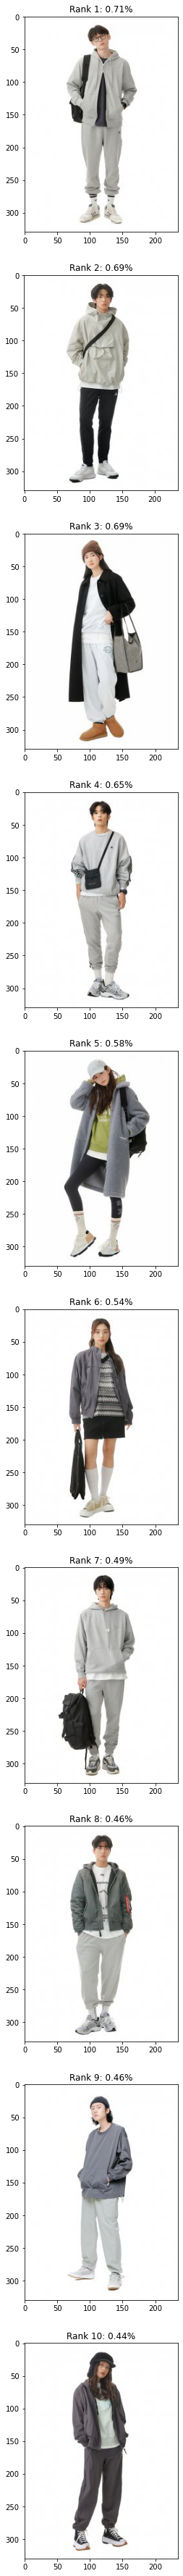

In [102]:
fig, axes = plt.subplots(10, 1, figsize=(10,10))
count = 0
for value, idx in zip(values, indices):
    print(index[idx])
    if os.path.exists(f'img_files/search_img/{text}') is False:
        os.mkdir(f'img_files/search_img/{text}')
    if os.path.exists(f'img_files/search_img/{text}/{input_text}') is False:
        os.mkdir(f'img_files/search_img/{text}/{input_text}')
    shutil.copy(f'img_files/코디2/{index[idx]}', f'img_files/search_img/{text}/{input_text}/{index[idx]}')
    axes[count].imshow(np.array(Image.open(f'img_files/코디2/{index[idx]}')))
    axes[count].set_title(f"Rank {count + 1}: {100 * value.item():.2f}%")
    
    count += 1
plt.subplots_adjust(top=5)
plt.show()

In [54]:
with open(f'data_files/image_features/coat_propro(tuning)/index.pickle', 'rb') as fr:
        index = pickle.load(fr)

FileNotFoundError: [Errno 2] No such file or directory: 'data_files/image_features/coat_propro(tuning)/index.pickle'

In [19]:
len(index)

204

In [406]:
pd.read_csv('data_files/img_infos_csv/코디2최종.csv', index_col='Unnamed: 0')

,사진,룩,제목,날짜
0,1.jpg,블루 컬러가 돋보이는 반쇼매 셔츠와 숏 팬츠를 매치하고 체크 패턴 에코백을 더해 마...,여행 가는 기분,2022.06.21
1,2.jpg,스트라이프 패턴 반소매 셔츠와 숏 팬츠를 매치하고 파나마 햇을 더해 마무리한 캐주얼 룩,시원한 여름,2022.06.21
2,3.jpg,레터링 프린팅이 돋보이는 민소매 티셔츠에 숏 팬츠를 매치하고 데님 소재 버킷햇과 선...,폭염 대비!,2022.06.21
3,4.jpg,퍼플 컬러 반소매 티셔츠와 스트라이프 패턴 셔츠를 레이어드하고 숏 팬츠를 매치해 마...,여행 준비 끝,2022.06.21
4,5.jpg,그래픽 프린팅이 돋보이는 반소매 티셔츠와 숏 팬츠를 매치하고 체크 패턴 셔츠를 걸쳐...,레드 컬러 포인트,2022.06.21
...,...,...,...,...
23067,23128.jpg,NaN,5,2010.07.31
23068,23129.jpg,NaN,4,2010.07.31
23069,23130.jpg,NaN,3,2010.07.31
23070,23131.jpg,NaN,2,2010.07.30


In [402]:
pd.read_csv('data_files/img_infos_csv/img_info_total.csv', index_col='Unnamed: 0')[['제목', '브랜드', '품번', '태그']]

,제목,브랜드,품번,태그
0,에센셜 쿨 코튼 2PACK 티셔츠,COVERNAT,CO0000STE1BK,"['반팔티셔츠', '티셔츠', '반팔', '반팔티', '오버핏반팔', '에센셜라인'..."
1,시티보이 빅오버 옥스포드 반팔 셔츠_Sky Blue,LAFUDGESTORE,m1037_685377,"['오버핏셔츠', '셔츠', '오버핏', '반팔셔츠', '시티보이셔츠', '하프셔츠..."
2,610 배송 린넨 라이크 카라 하프 니트 8 COLORLINENLIKE COLLA...,SUARE,1084865,"['여름니트', '반팔', '카라티', '남자니트', '반팔니트', '카라', '서..."
3,011502 폴로 피케 반팔티,GIORDANO,011502,"['반팔티셔츠', '반팔티', 'PK', '카라티셔츠', '카라티']"
4,베이식 긴팔 티셔츠 화이트BASIC LONG SLEEVE TSHIRT WHITE,MUSINSA STANDARD,MITS0009-WH,"['기본티', '긴팔티', '라운드넥', '루즈핏', '면티셔츠', '무지티', '..."
...,...,...,...,...
29595,FACELOGO BANDINGMARDI CROP TSHIRTBLACK,ITER WOMENS,IIEMFRT004BK,NaN
29596,LIFE IS TEEPUNK ROCK TEECHARCOAL,OUTSTANDING,OSTD244,"['여름반팔', '반팔티', '반팔', '티셔츠', '로고티셔츠', '오버핏', '..."
29597,펫 클럽 해피콜리 하프 티셔츠 블랙,ACOVER,ACT22957,NaN
29598,웨일 티셔츠 블랙,COVERNAT,CO2202ST74BK,"['반팔티', '반팔', '반팔티셔츠', '티셔츠', '로고티셔츠', '쿨코튼', ..."


In [415]:
pd.read_csv('data_files/img_infos_csv/img_info_total.csv', index_col='Unnamed: 0')[['제목', '브랜드', '품번', '태그']]

,제목,브랜드,품번,태그
0,에센셜 쿨 코튼 2PACK 티셔츠,COVERNAT,CO0000STE1BK,"['반팔티셔츠', '티셔츠', '반팔', '반팔티', '오버핏반팔', '에센셜라인'..."
1,시티보이 빅오버 옥스포드 반팔 셔츠_Sky Blue,LAFUDGESTORE,m1037_685377,"['오버핏셔츠', '셔츠', '오버핏', '반팔셔츠', '시티보이셔츠', '하프셔츠..."
2,610 배송 린넨 라이크 카라 하프 니트 8 COLORLINENLIKE COLLA...,SUARE,1084865,"['여름니트', '반팔', '카라티', '남자니트', '반팔니트', '카라', '서..."
3,011502 폴로 피케 반팔티,GIORDANO,011502,"['반팔티셔츠', '반팔티', 'PK', '카라티셔츠', '카라티']"
4,베이식 긴팔 티셔츠 화이트BASIC LONG SLEEVE TSHIRT WHITE,MUSINSA STANDARD,MITS0009-WH,"['기본티', '긴팔티', '라운드넥', '루즈핏', '면티셔츠', '무지티', '..."
...,...,...,...,...
29595,FACELOGO BANDINGMARDI CROP TSHIRTBLACK,ITER WOMENS,IIEMFRT004BK,NaN
29596,LIFE IS TEEPUNK ROCK TEECHARCOAL,OUTSTANDING,OSTD244,"['여름반팔', '반팔티', '반팔', '티셔츠', '로고티셔츠', '오버핏', '..."
29597,펫 클럽 해피콜리 하프 티셔츠 블랙,ACOVER,ACT22957,NaN
29598,웨일 티셔츠 블랙,COVERNAT,CO2202ST74BK,"['반팔티', '반팔', '반팔티셔츠', '티셔츠', '로고티셔츠', '쿨코튼', ..."


In [413]:
pd.read_csv('data_files/caption_files/coat_prepro_caption.csv', index_col='Unnamed: 0')[['image', 'caption']]

,image,caption
0,img_files/origin_coat_img(prepro)/시티보이 빅오버 옥스포...,Boy Oxford Bigover City Short ShirtSKY BLUE Sl...
1,img_files/origin_coat_img(prepro)/시티보이 빅오버 옥스포...,"Boy Shirt Oxford ROYAL Look, Overfit, Bigover ..."
2,img_files/origin_coat_img(prepro)/22ALL 2 TONE...,"Gray, Fit Hoodie all tone Arch Rouge"
3,img_files/origin_coat_img(prepro)/최현욱 착용22SS 2...,"wook T Choi sleeved, graphics, Arch Tee shirt,..."
4,img_files/origin_coat_img(prepro)/시티보이 빅오버 옥스포...,Boy Oxford sleeved city boy summer Bigover Cit...
...,...,...
11185,img_files/origin_coat_img(prepro)/쿨에버 티셔츠블랙.jpg,"T Beat Coolmax, persimmon shirt sleeved sleeve..."
11186,img_files/origin_coat_img(prepro)/WORLDWIDE AM...,"Ames T sleeved Worldwide sleeved, short Overfi..."
11187,img_files/origin_coat_img(prepro)/N215UPA910 유...,"T National Ss Pal sleeved sleeved, pACK Short ..."
11188,img_files/origin_coat_img(prepro)/LIFE IS TEEP...,"TEECHARCOAL, logo overfit sleeved, summer LIFE..."
